In [10]:
!which python

/home/ebeyerle/anaconda3/envs/pytorch/bin/python


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())

/media/ebeyerle/seagate/frenkel/ellipsoid/GB/nvt/GB_3_5_2_1/anneal/notebooks


In [12]:
params = {'legend.fontsize': 25,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

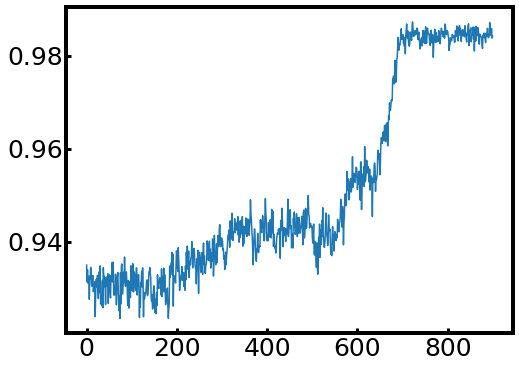

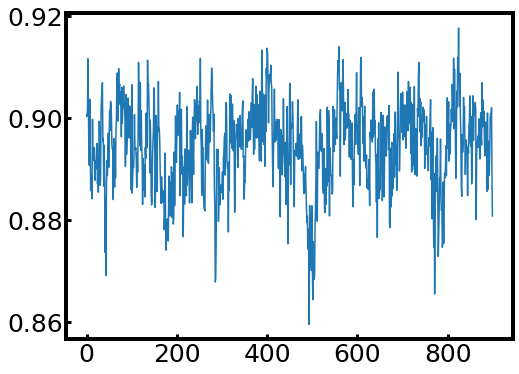

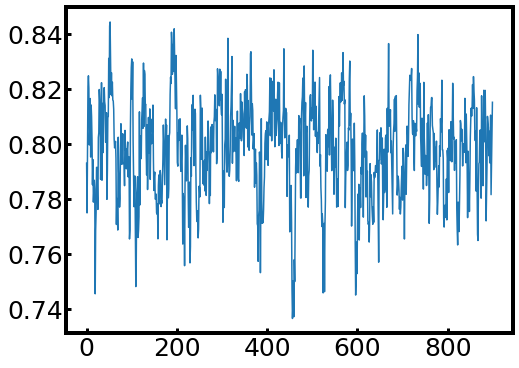

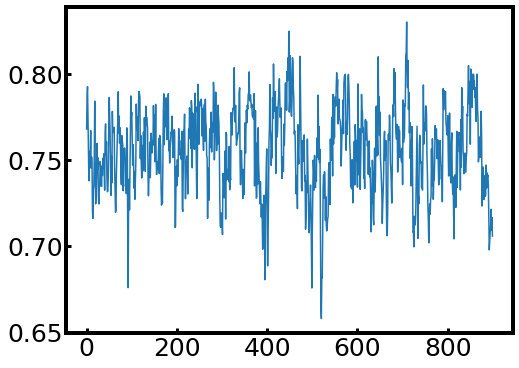

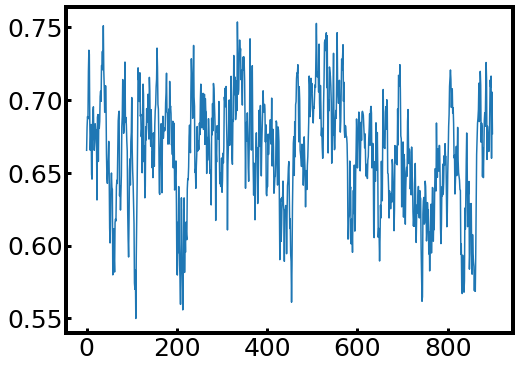

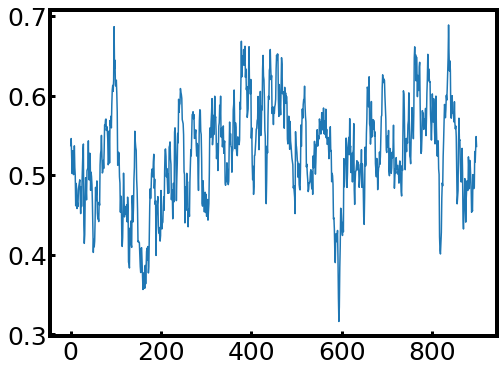

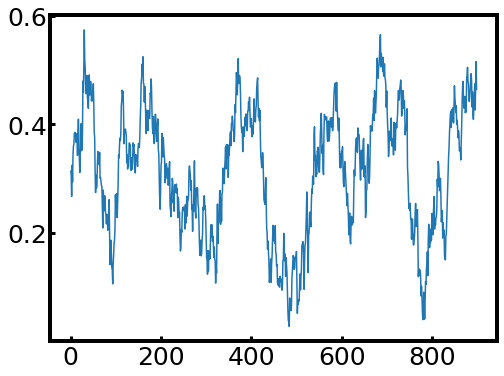

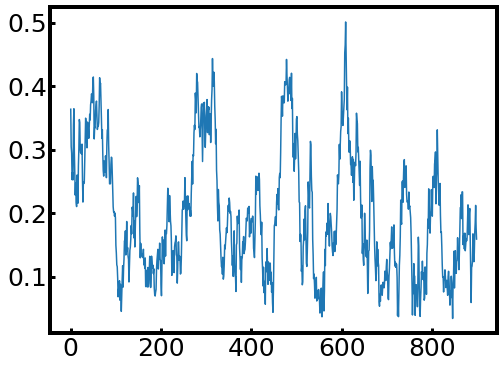

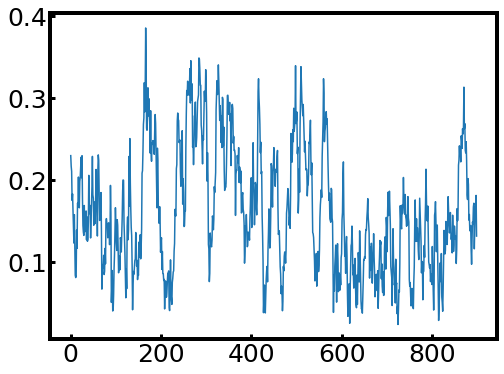

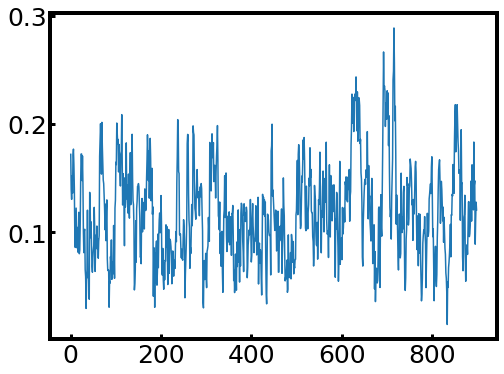

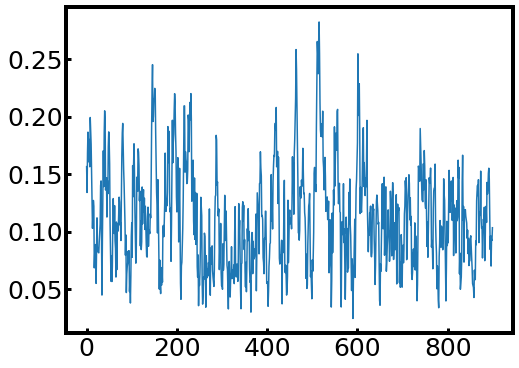

In [13]:
T_list = [0.2, 0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]
mean_S = np.zeros(len(T_list))
std_S = np.zeros(len(T_list))

for i, temperature in enumerate(T_list):

    S = np.load('thermomaps-gayberne/%sT/S.npy' % temperature)[100:]
    plt.plot(S)
    plt.show()
    plt.close()
    mean_S[i] = S.mean()
    std_S[i] = S.std()

100 1024 0.01


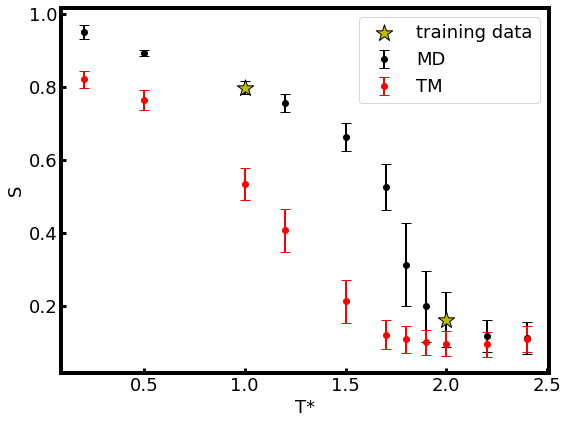

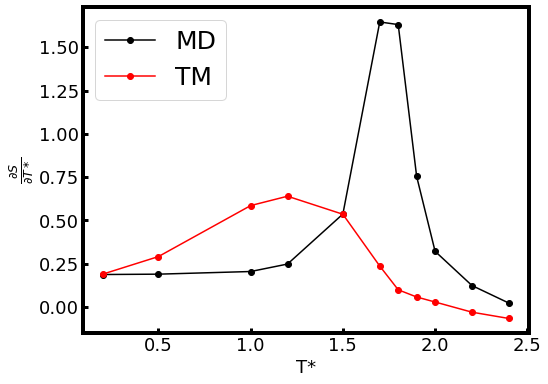

In [8]:
for nstep in [100]:
    for bs in [1024]:
        for lr in [0.01]:
            print(nstep, bs, lr)

            try:
                mag = np.load('nstep_%s_bs_%s_lr_%smagnetization_redo_short.npy' % (nstep, bs, lr))
                plt.errorbar(T_list, mean_S, yerr = std_S, elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'k', label = 'MD')
                plt.errorbar(mag[:,0], mag[:,1], yerr = mag[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'r', label = 'TM',)
                #mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
                #plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
                #            capsize = 5, c = 'b', label = 'two-point TM',)
                plt.scatter(T_list[2], mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
                plt.scatter(T_list[-3], mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
                           label = 'training data')
                plt.legend(fontsize = 18)
                plt.xlabel('T*', size = 18)
                plt.ylabel('S', size = 18)
                plt.tick_params(labelsize = 18)
                plt.tight_layout()
                #plt.savefig('magnetization_tm_md_comparison.pdf', dpi = 300)
                plt.show()
                plt.close()
                
                plt.plot(T_list, -np.gradient(mean_S, T_list), marker = 'o', c = 'k', label = 'MD')
                plt.plot(mag[:,0], -np.gradient(mag[:,1], mag[:,0]), marker = 'o', c = 'r', label = 'TM')
                #plt.plot(mag_med[:,0], -np.gradient(mag_med[:,1], mag_med[:,0]), marker = 'o', c = 'b', label = 'more TM')
                plt.ylabel(r'$\frac{\partial S}{\partial T*}$', size = 18)
                plt.xlabel('T*', size = 18)
                plt.tick_params(labelsize = 18)
                plt.legend()
                plt.show()
                plt.close()
            except FileNotFoundError:
                pass

25 256 0.001


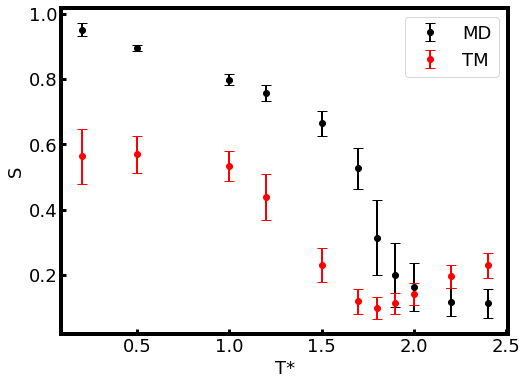

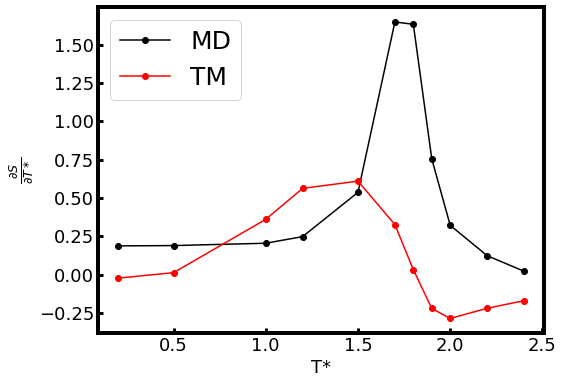

25 256 0.05
25 256 0.01


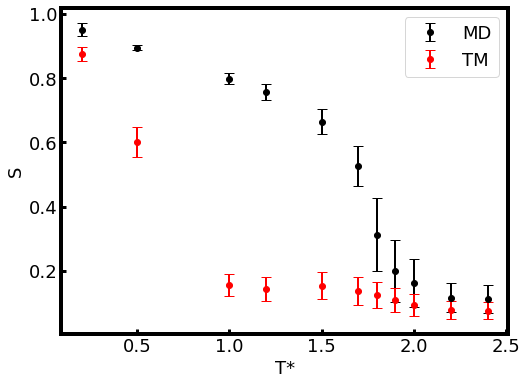

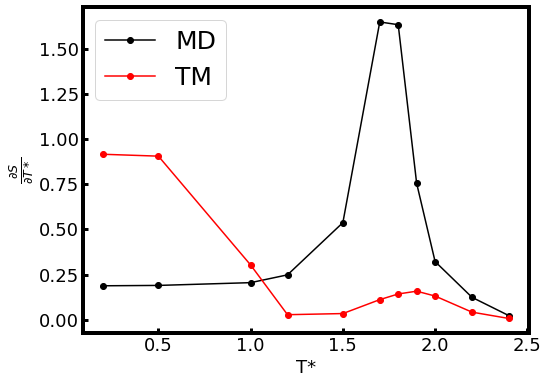

25 512 0.001


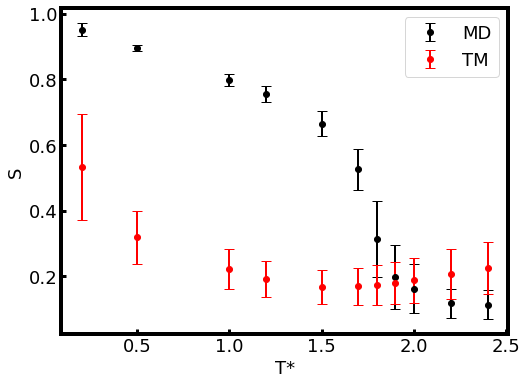

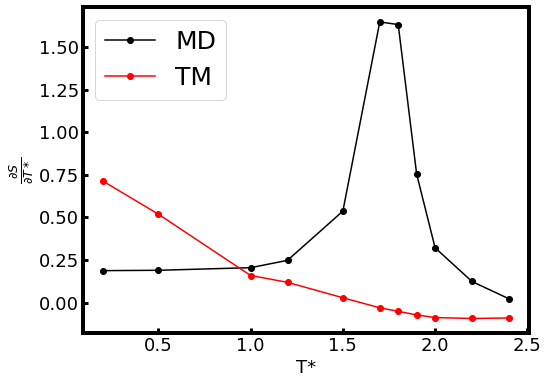

25 512 0.05
25 512 0.01


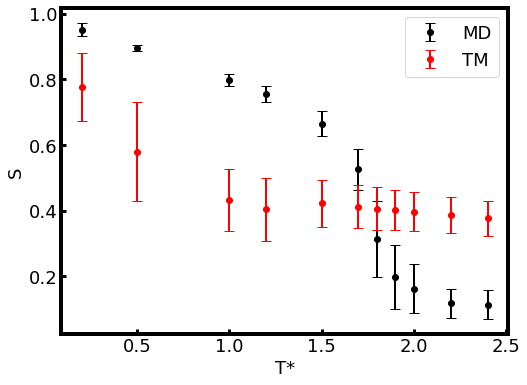

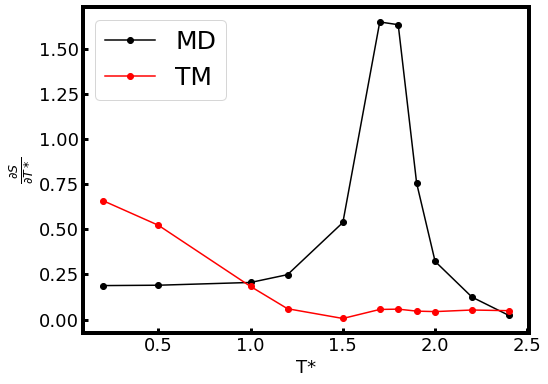

25 1024 0.001


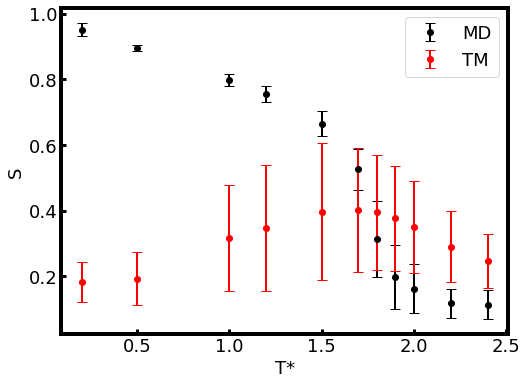

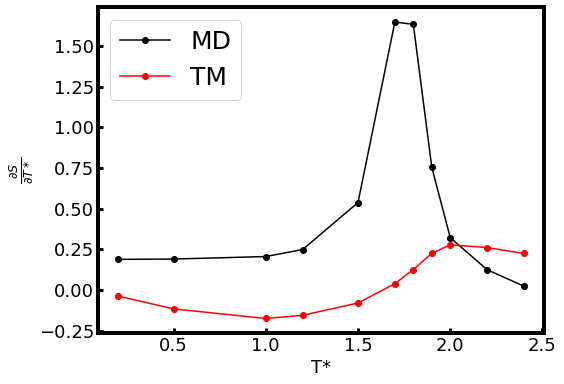

25 1024 0.05
25 1024 0.01


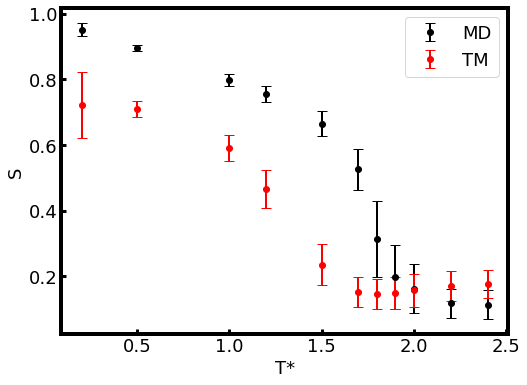

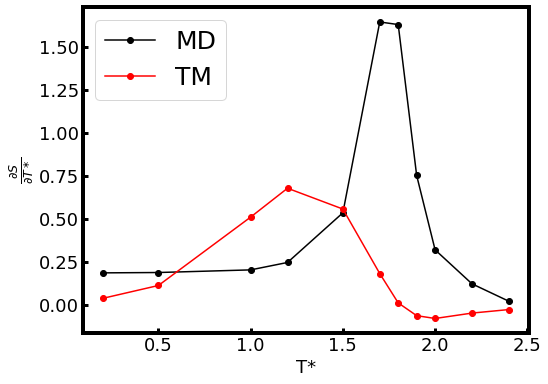

25 2048 0.001


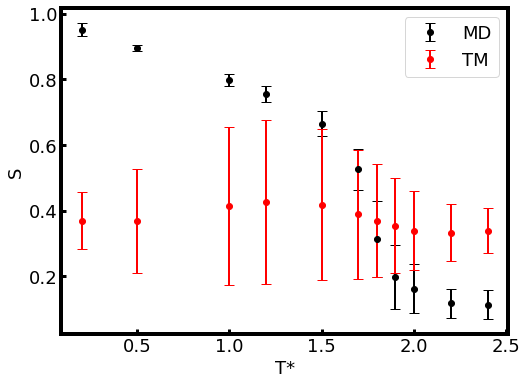

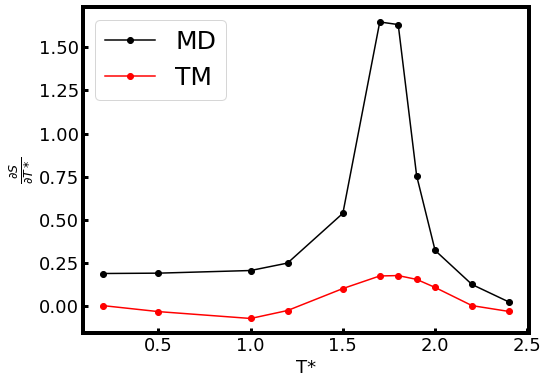

25 2048 0.05
25 2048 0.01


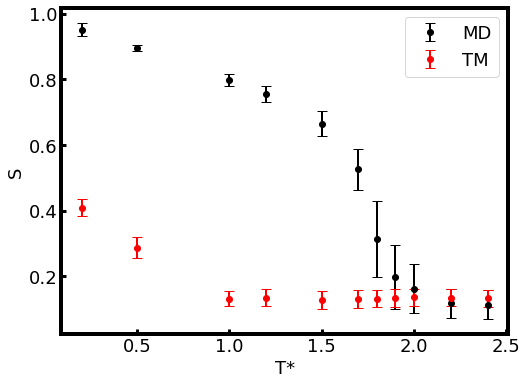

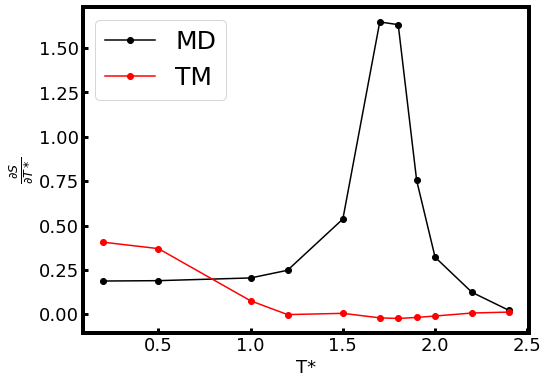

50 256 0.001


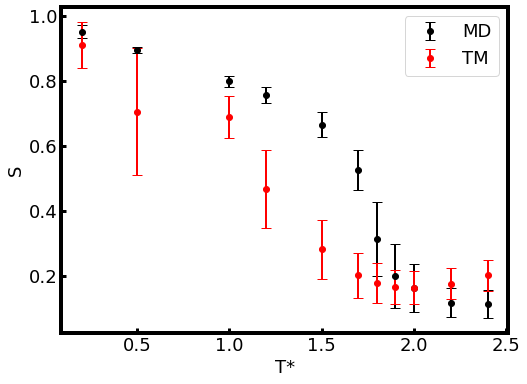

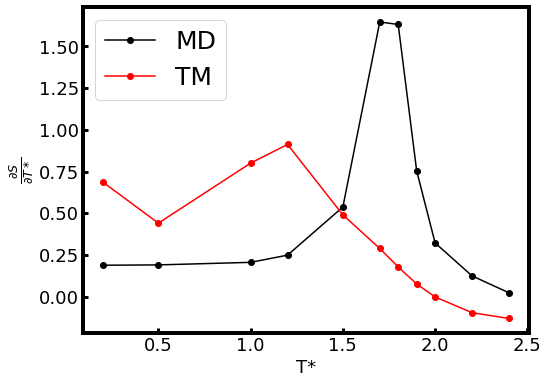

50 256 0.05
50 256 0.01


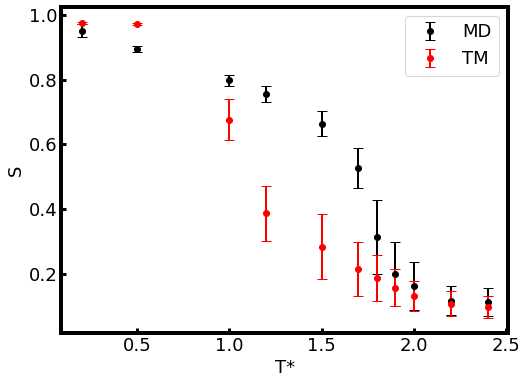

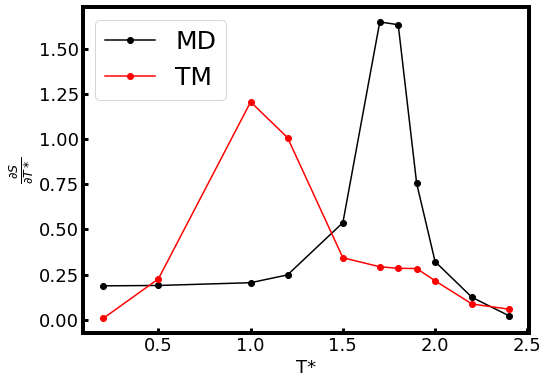

50 512 0.001


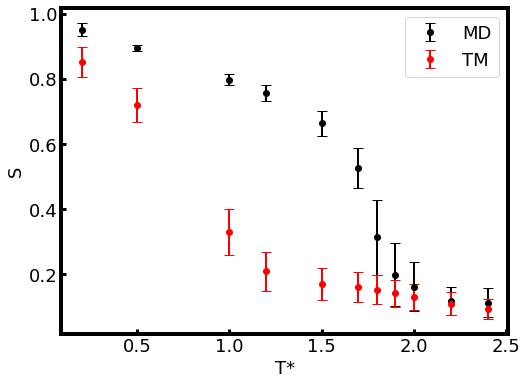

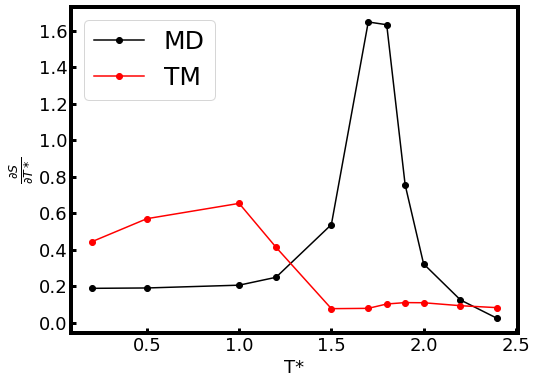

50 512 0.05
50 512 0.01


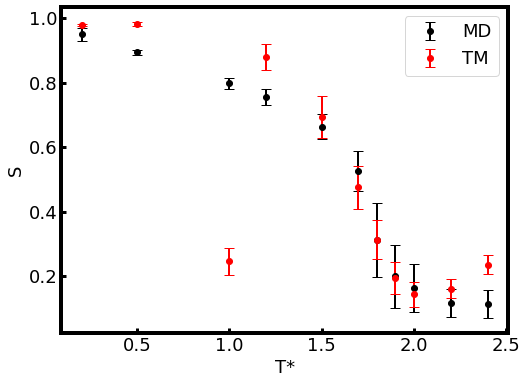

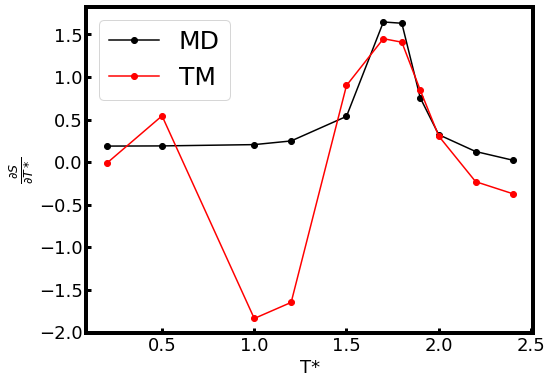

50 1024 0.001


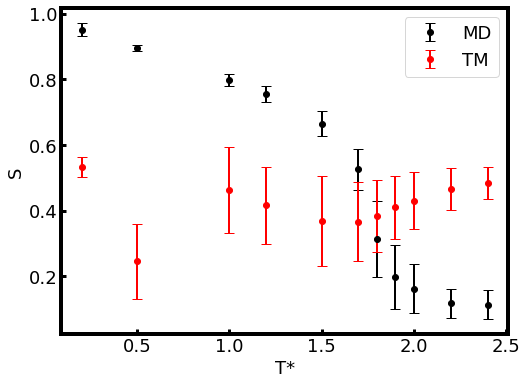

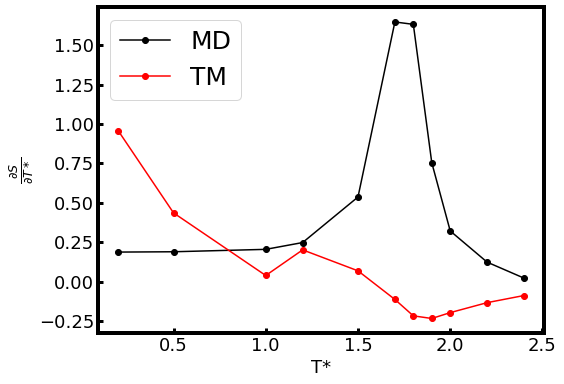

50 1024 0.05
50 1024 0.01


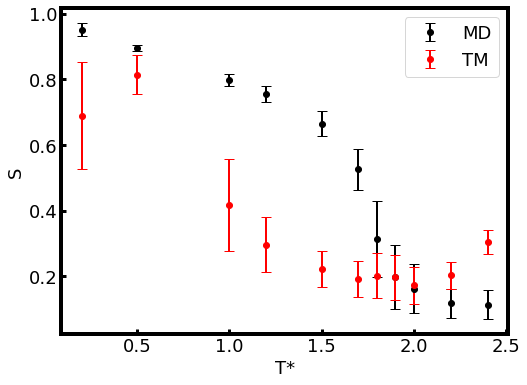

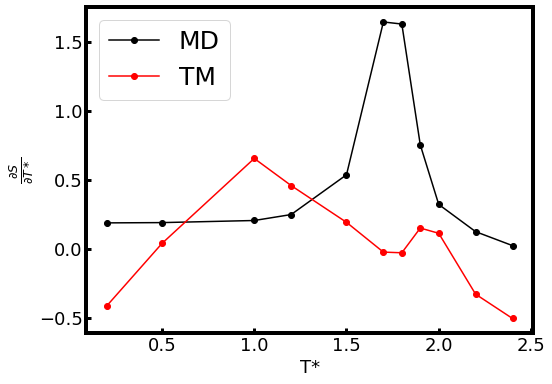

50 2048 0.001


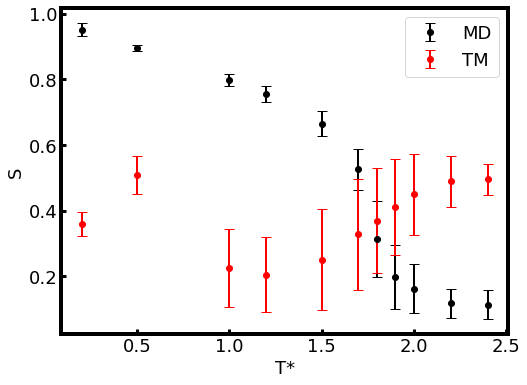

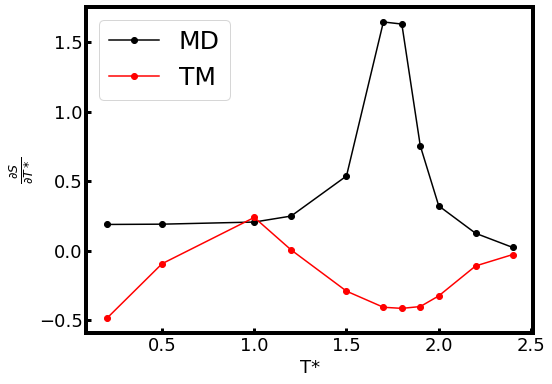

50 2048 0.05
50 2048 0.01


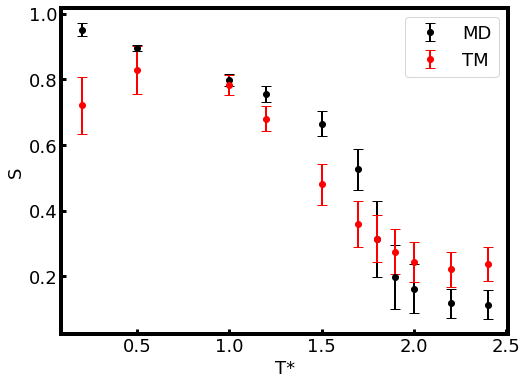

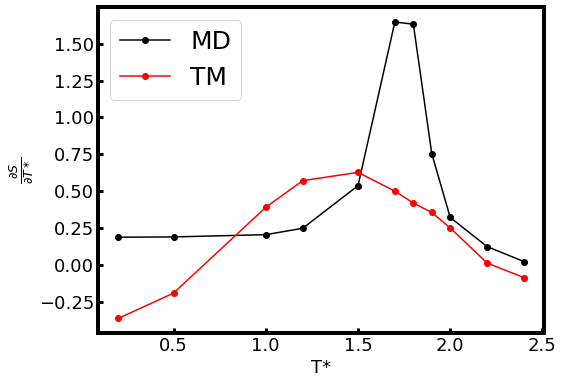

100 256 0.001


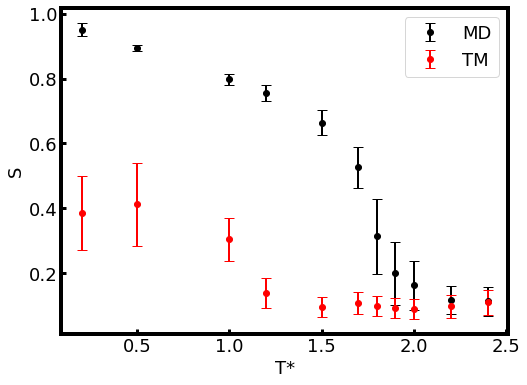

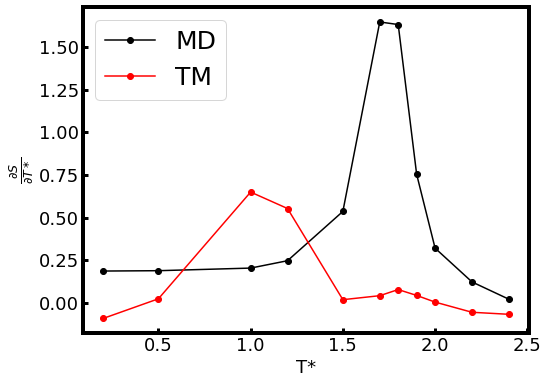

100 256 0.05
100 256 0.01


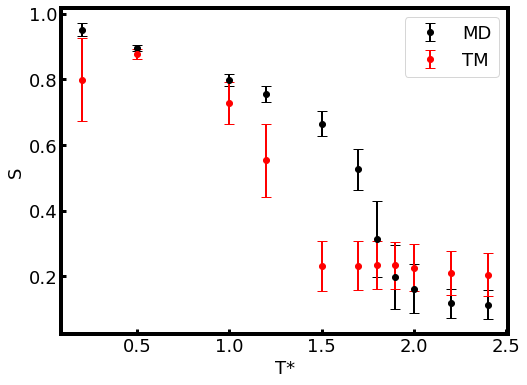

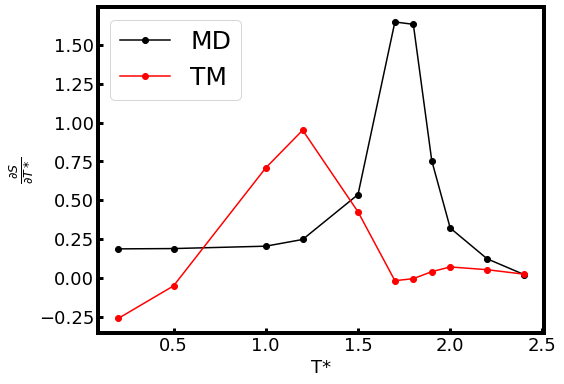

100 512 0.001


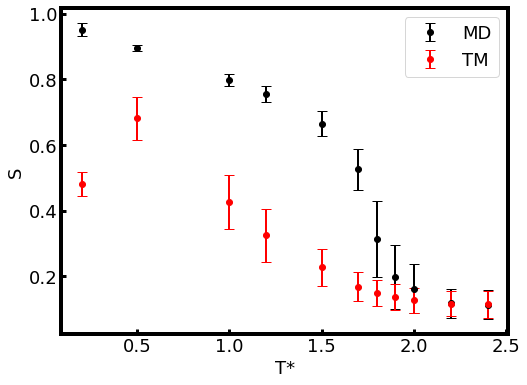

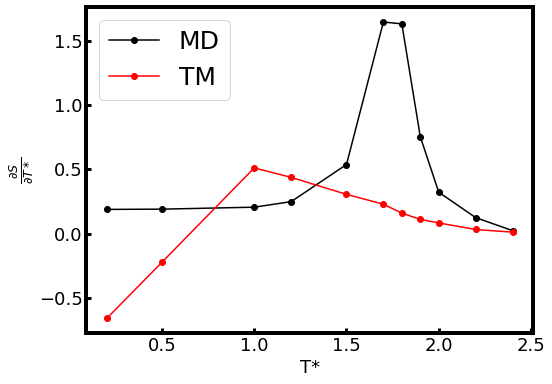

100 512 0.05
100 512 0.01


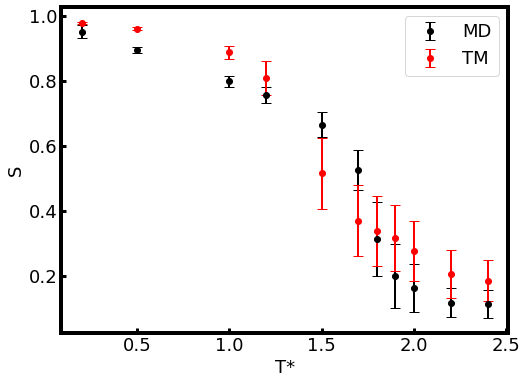

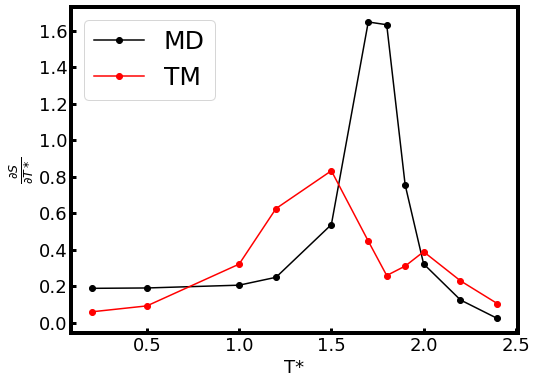

100 1024 0.001


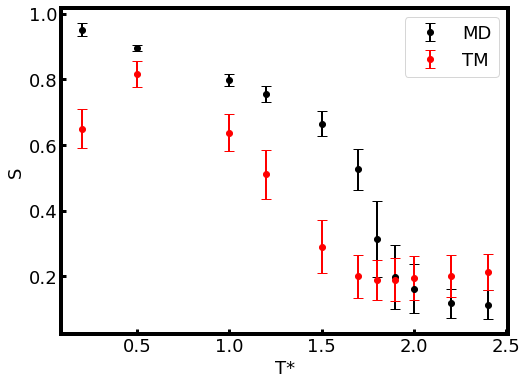

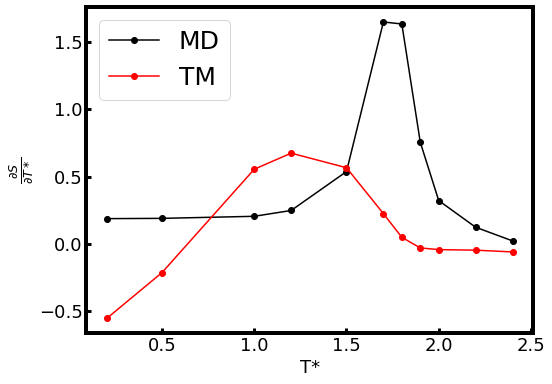

100 1024 0.05
100 1024 0.01


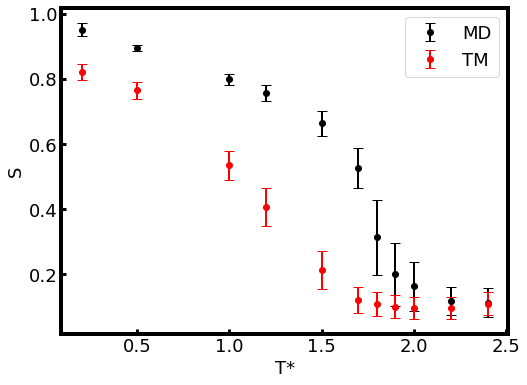

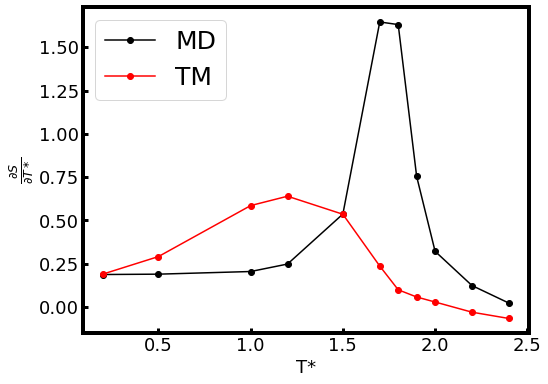

100 2048 0.001


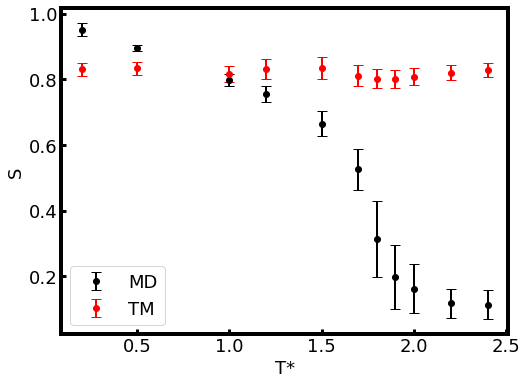

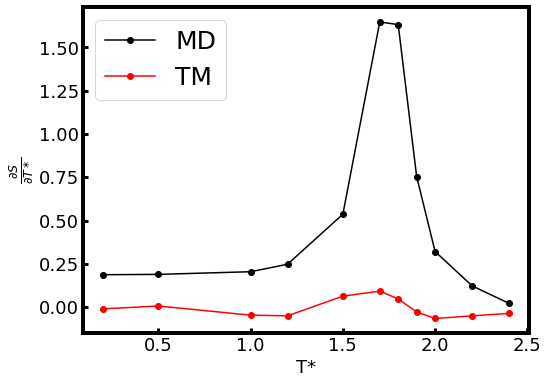

100 2048 0.05
100 2048 0.01


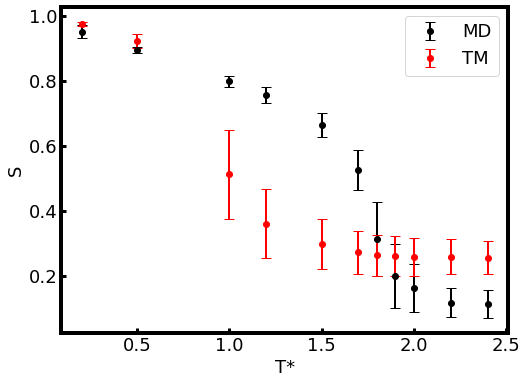

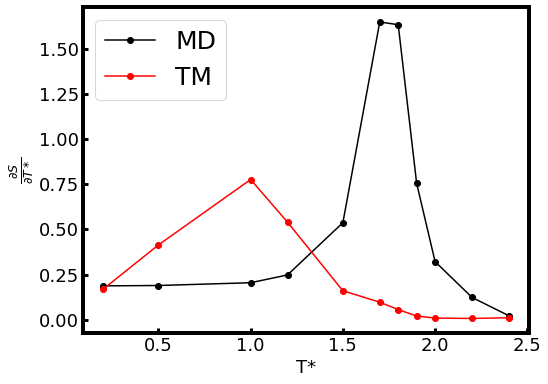

In [9]:
for nstep in [25, 50, 100]:
    for bs in [256, 512, 1024, 2048]:
        for lr in [0.001, 0.05, 0.01]:
            print(nstep, bs, lr)

            try:
                mag = np.load('nstep_%s_bs_%s_lr_%smagnetization_redo_short.npy' % (nstep, bs, lr))
                plt.errorbar(T_list, mean_S, yerr = std_S, elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'k', label = 'MD')
                plt.errorbar(mag[:,0], mag[:,1], yerr = mag[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'r', label = 'TM',)
                #mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
                #plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
                #            capsize = 5, c = 'b', label = 'two-point TM',)
                plt.legend(fontsize = 18)
                plt.xlabel('T*', size = 18)
                plt.ylabel('S', size = 18)
                plt.tick_params(labelsize = 18)
                plt.show()
                plt.close()
                
                plt.plot(T_list, -np.gradient(mean_S, T_list), marker = 'o', c = 'k', label = 'MD')
                plt.plot(mag[:,0], -np.gradient(mag[:,1], mag[:,0]), marker = 'o', c = 'r', label = 'TM')
                #plt.plot(mag_med[:,0], -np.gradient(mag_med[:,1], mag_med[:,0]), marker = 'o', c = 'b', label = 'more TM')
                plt.ylabel(r'$\frac{\partial S}{\partial T*}$', size = 18)
                plt.xlabel('T*', size = 18)
                plt.tick_params(labelsize = 18)
                plt.legend()
                plt.show()
                plt.close()
            except FileNotFoundError:
                pass

25 256 0.001


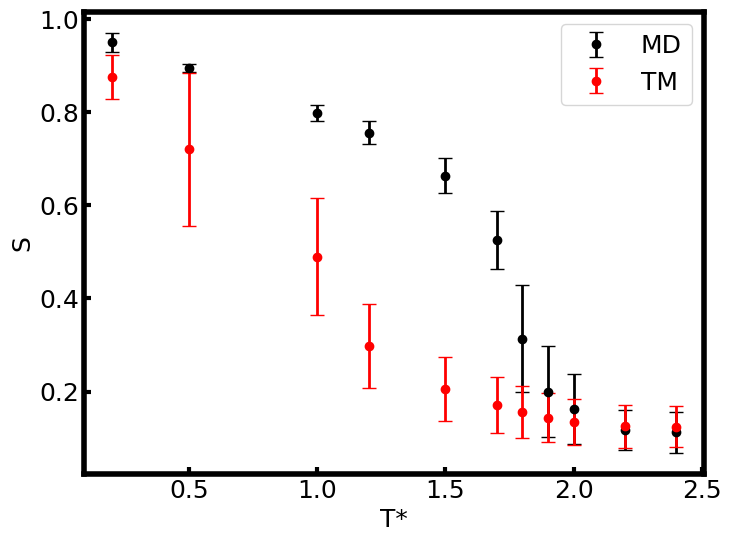

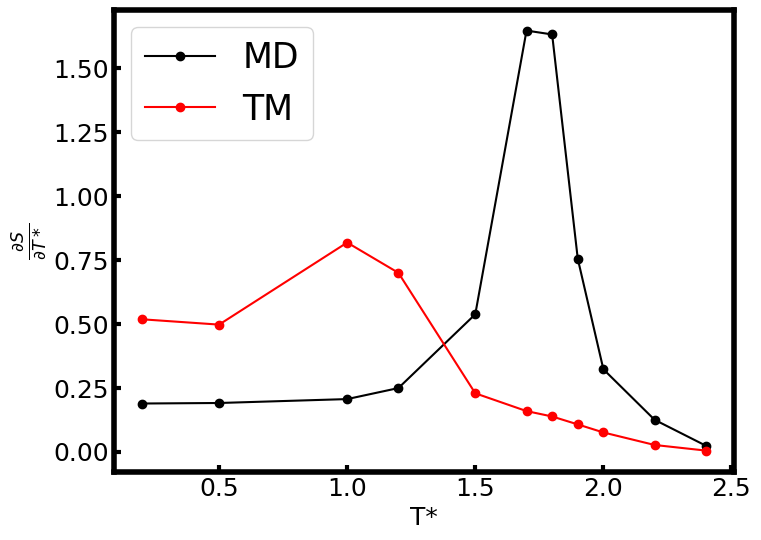

25 256 0.005


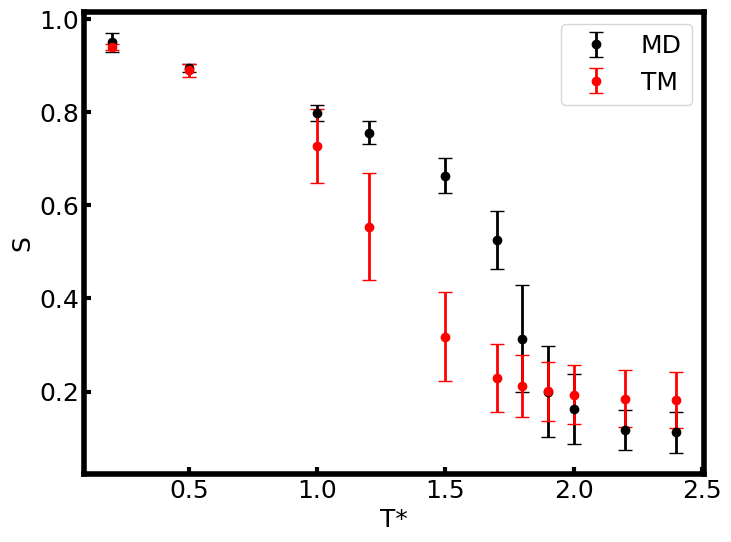

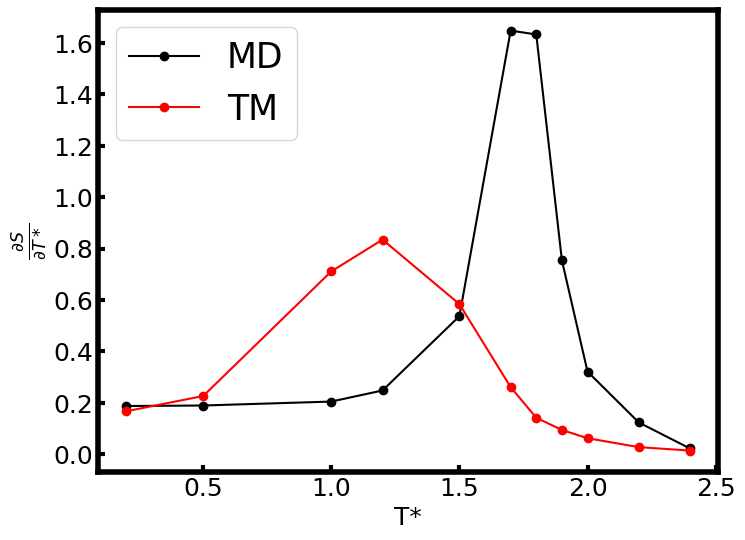

25 256 0.01


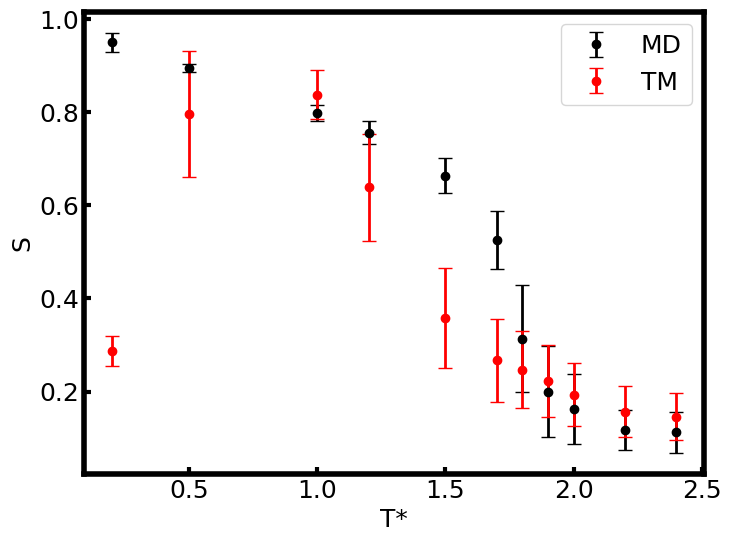

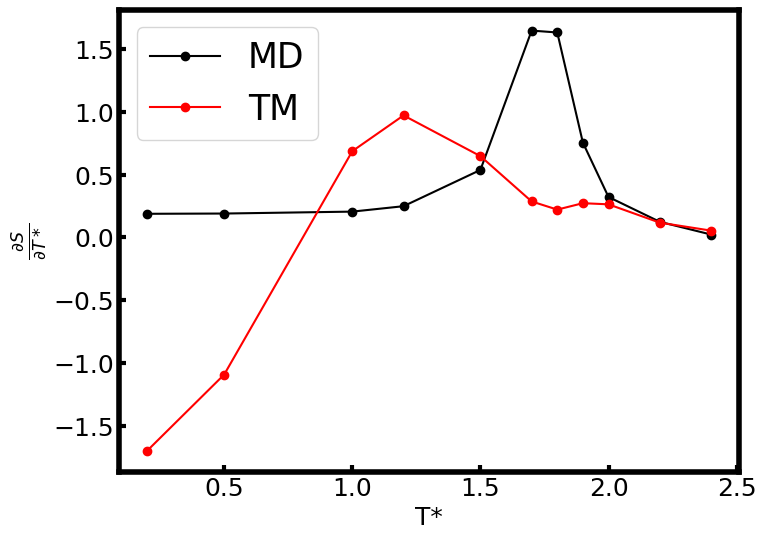

25 512 0.001


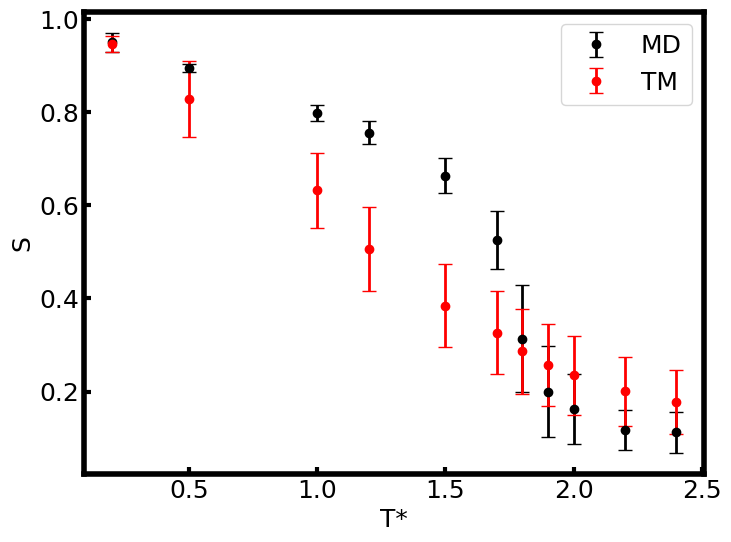

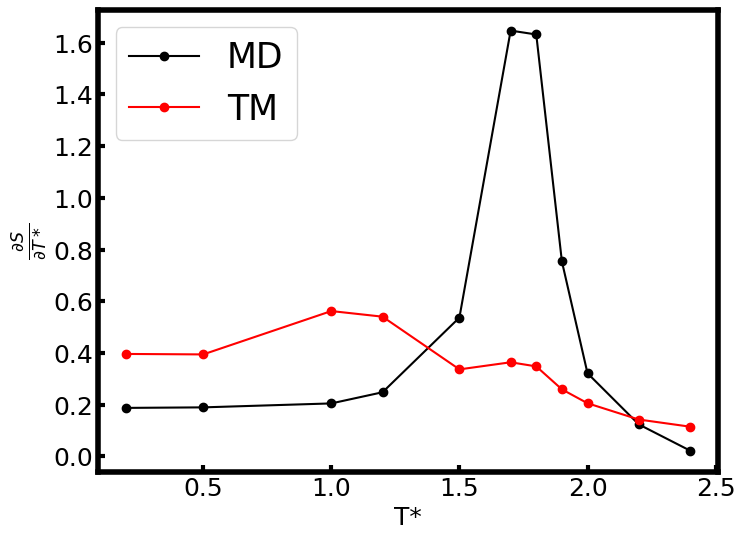

25 512 0.005


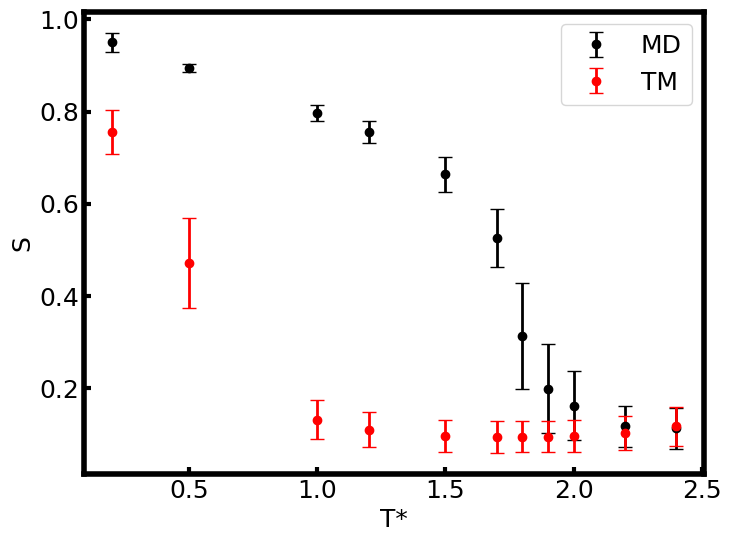

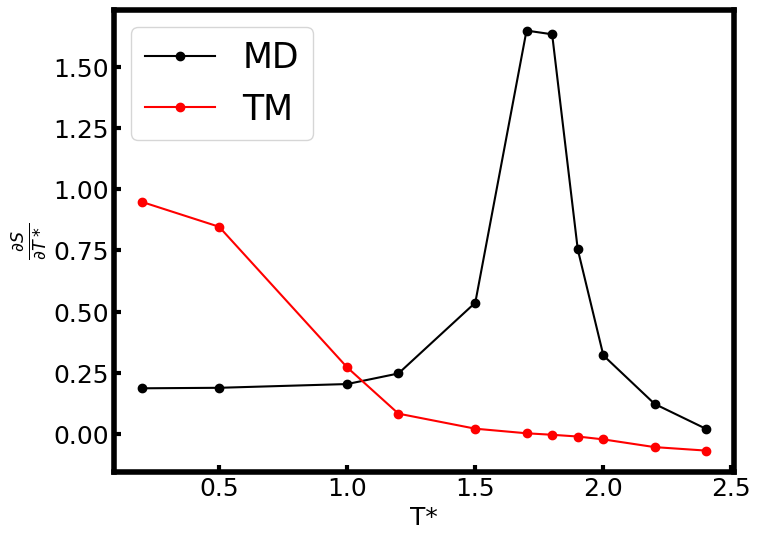

25 512 0.01


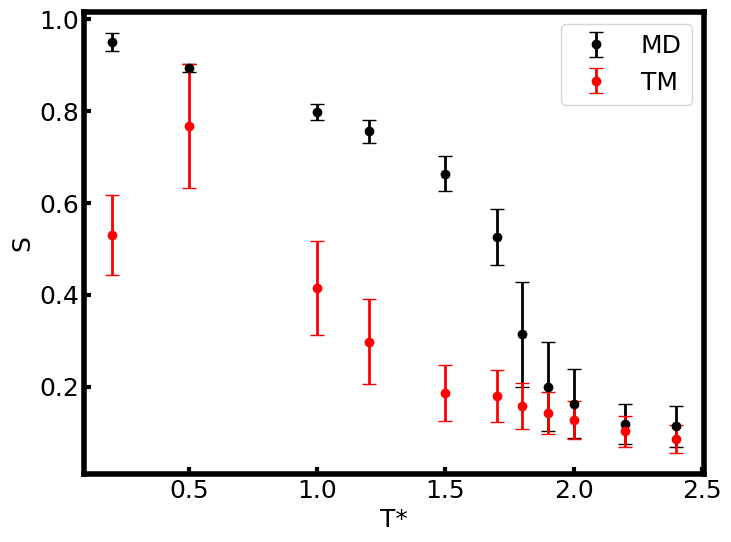

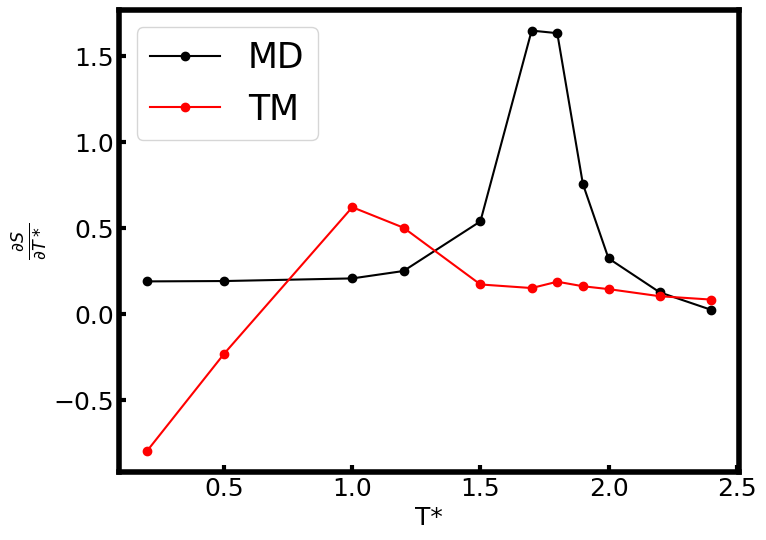

25 1024 0.001


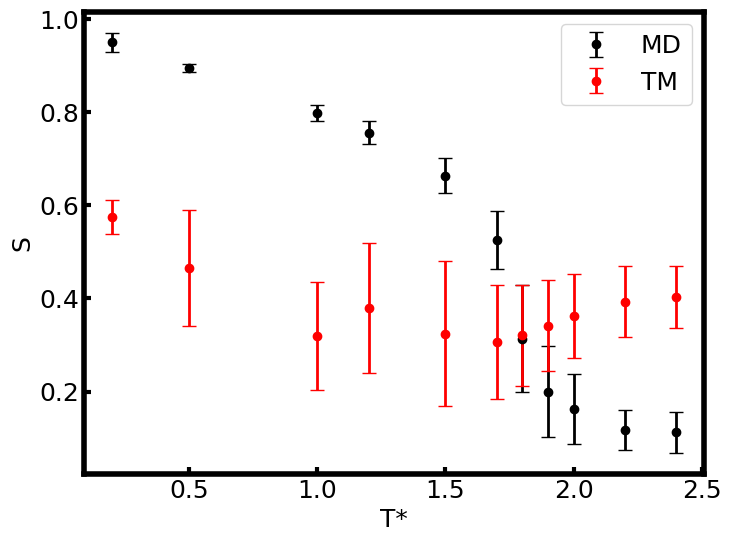

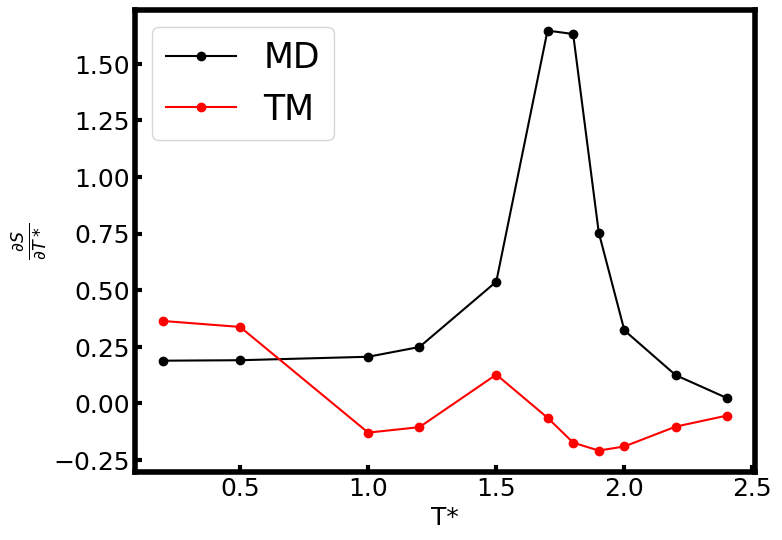

25 1024 0.005


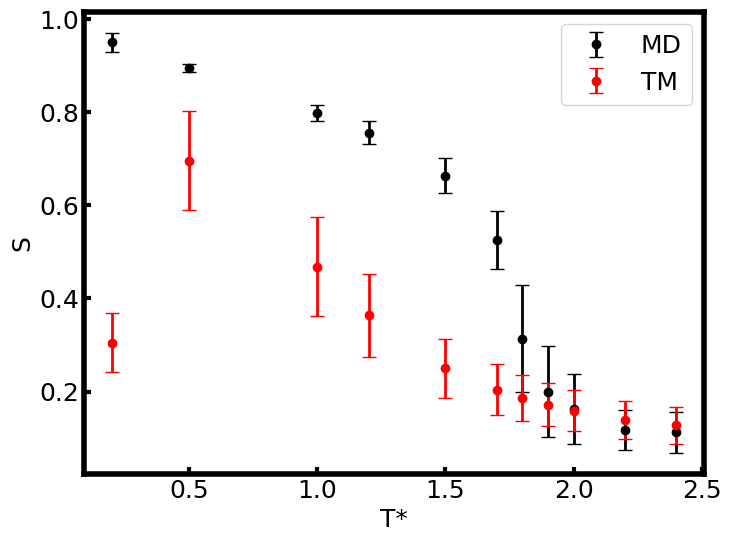

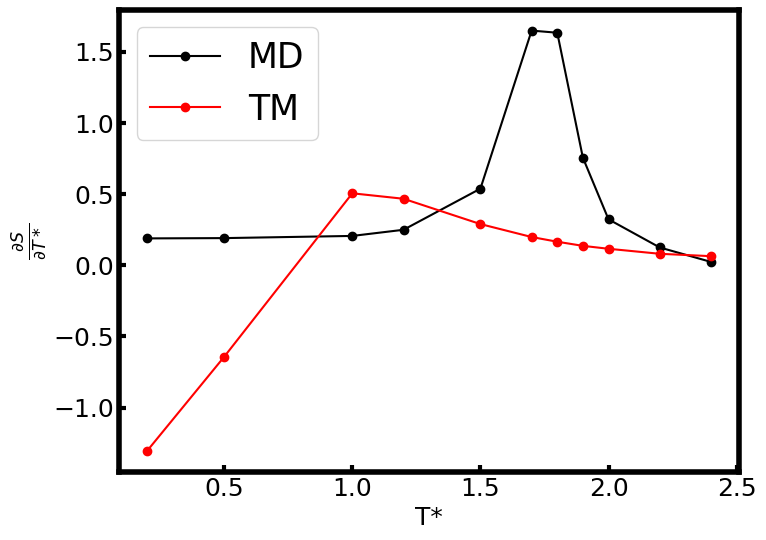

25 1024 0.01


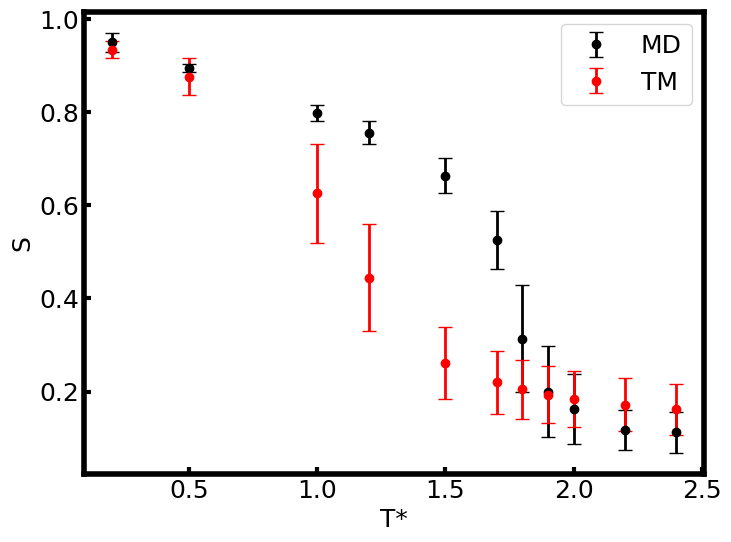

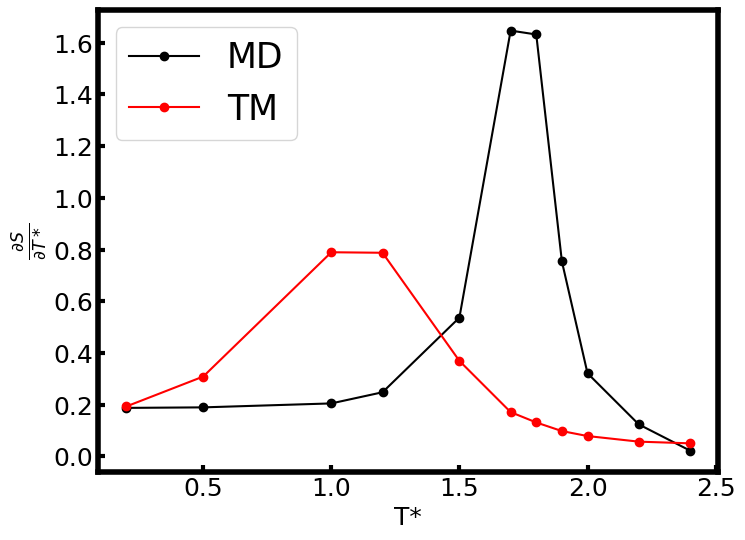

25 2048 0.001


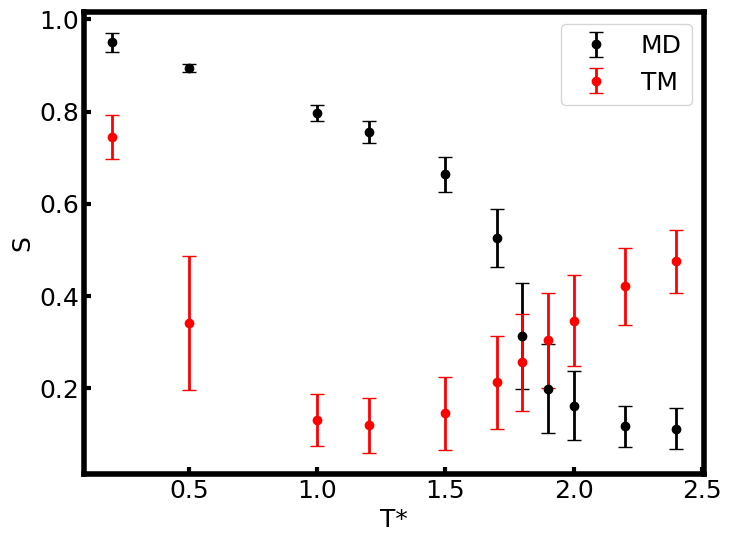

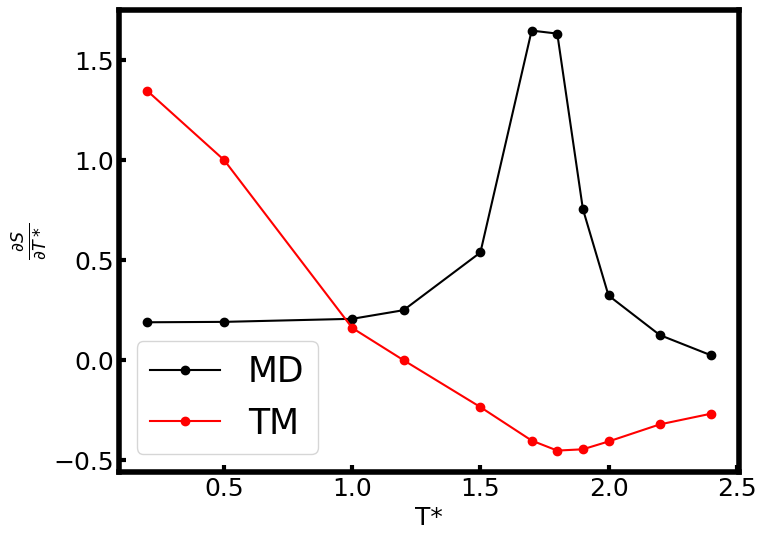

25 2048 0.005


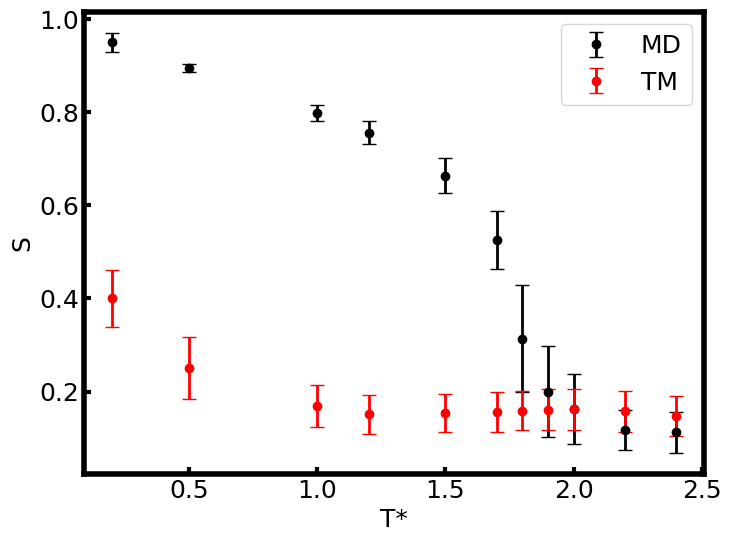

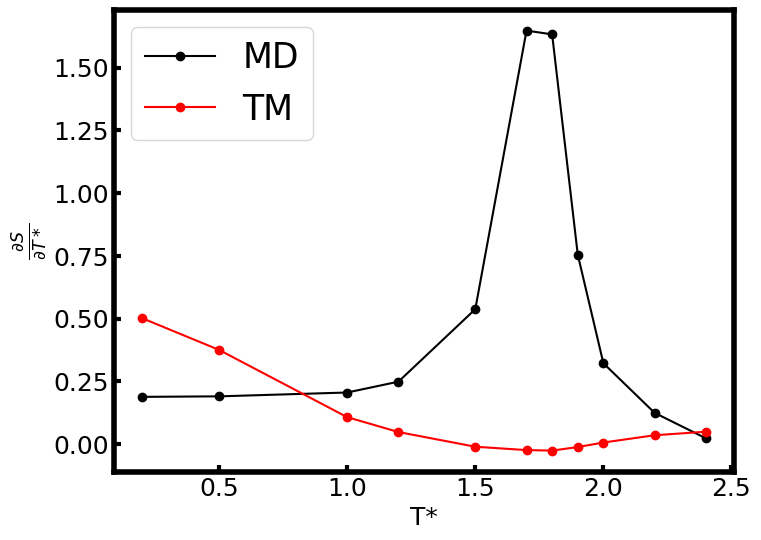

25 2048 0.01


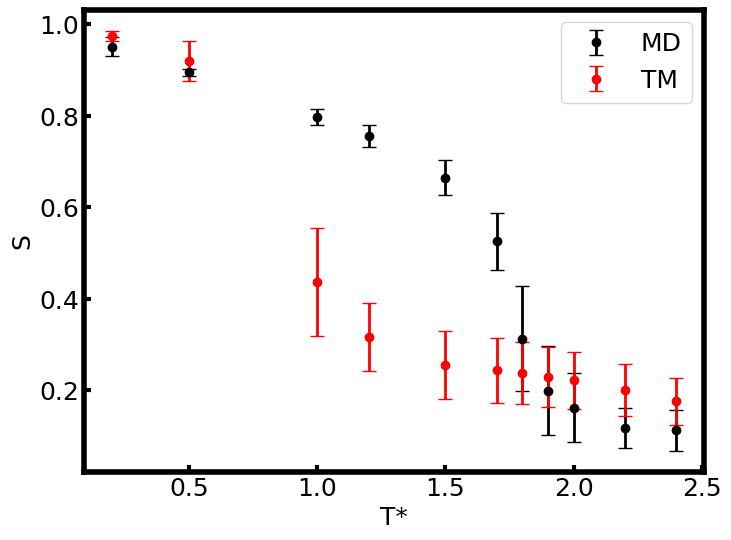

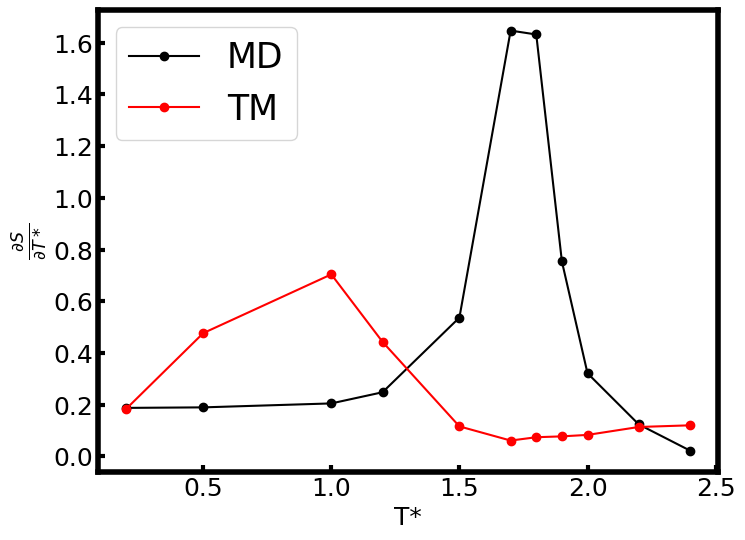

50 256 0.001


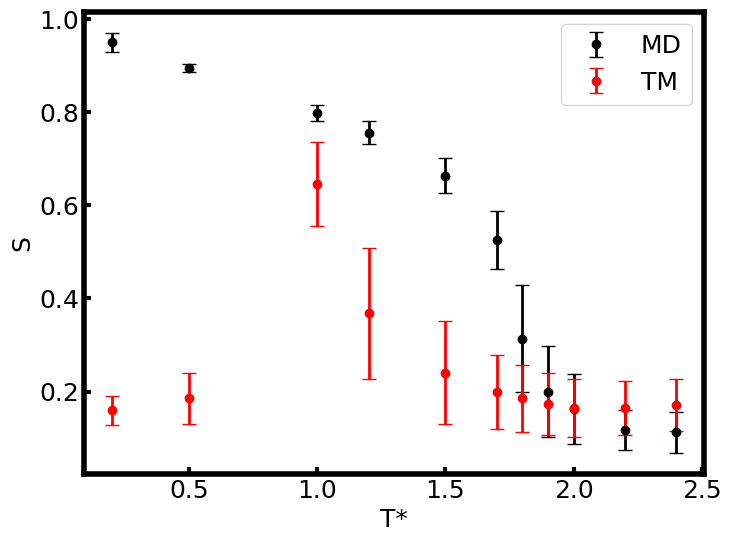

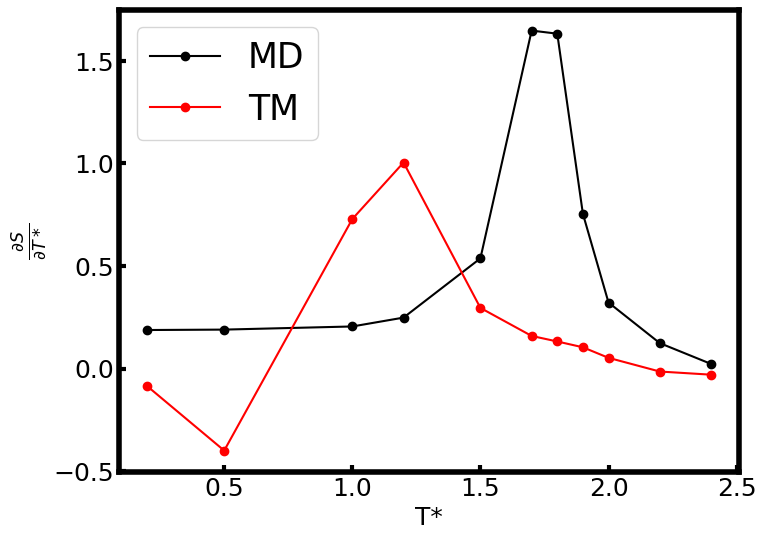

50 256 0.005


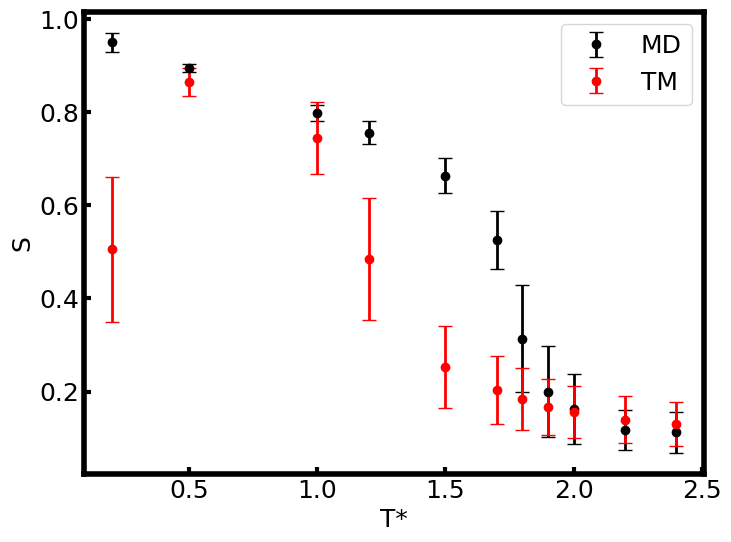

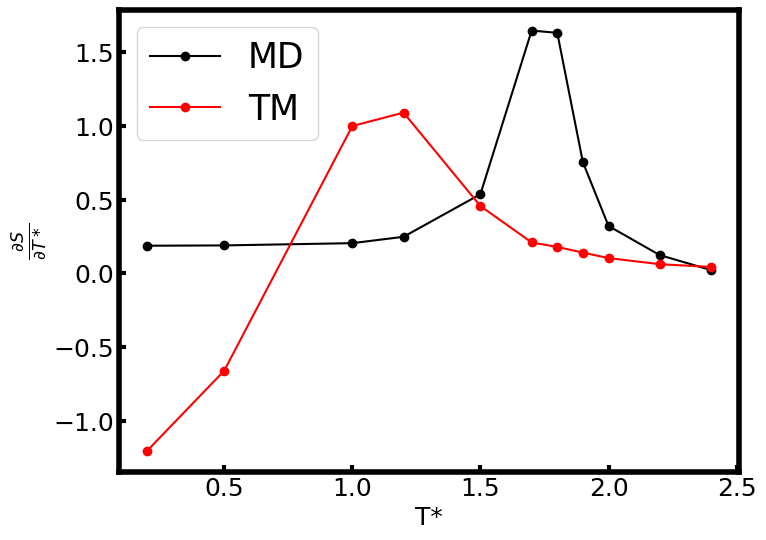

50 256 0.01


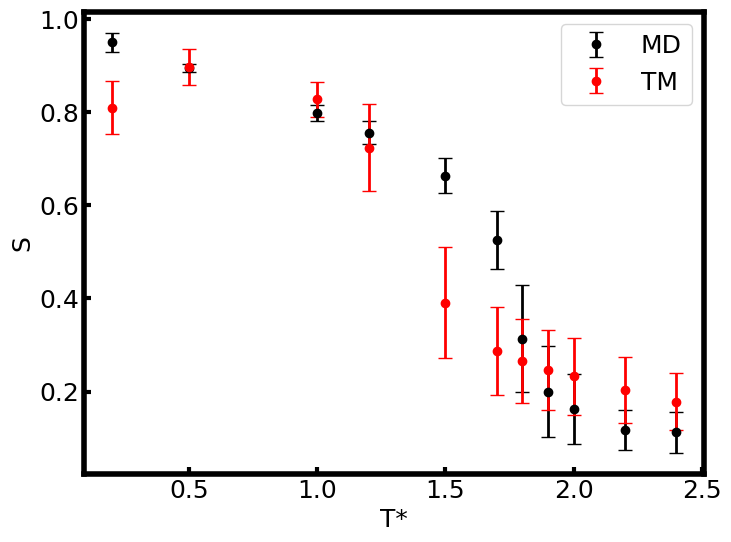

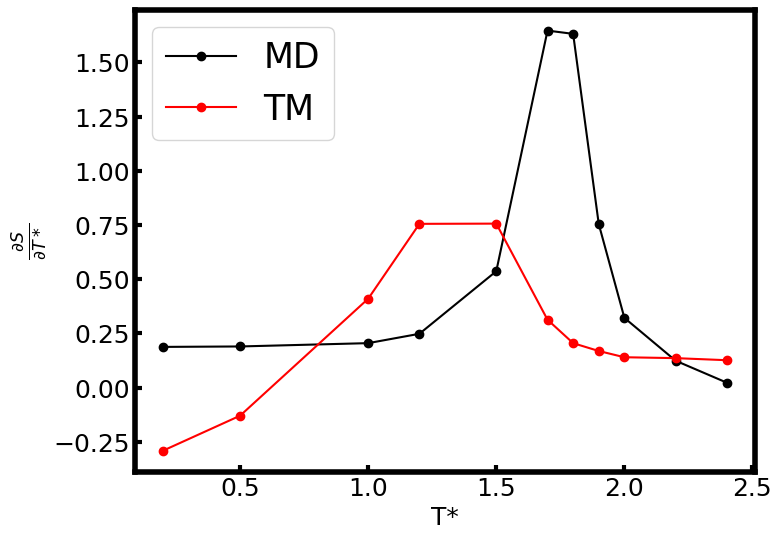

50 512 0.001


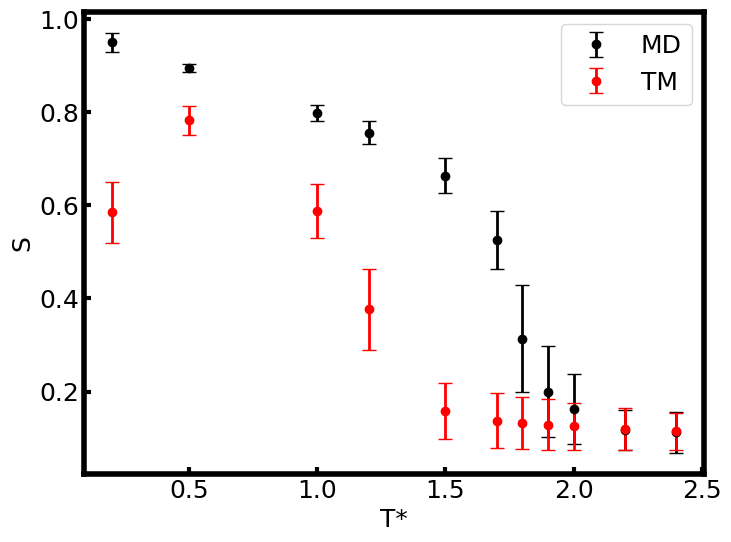

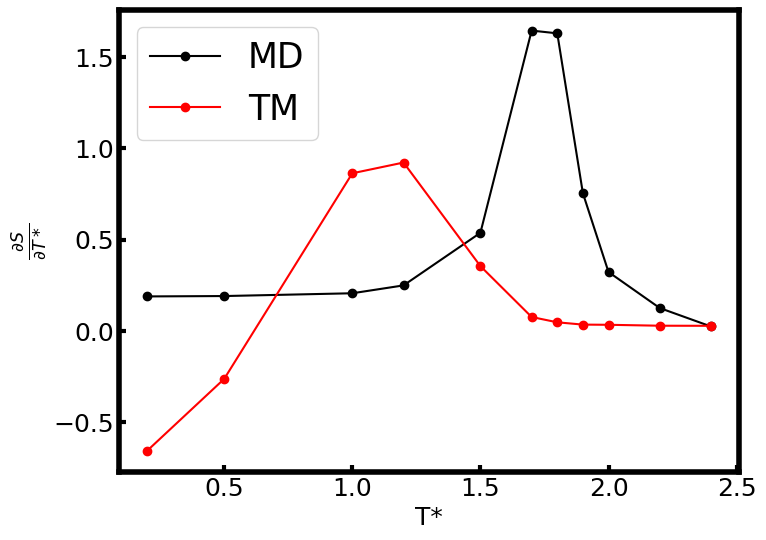

50 512 0.005


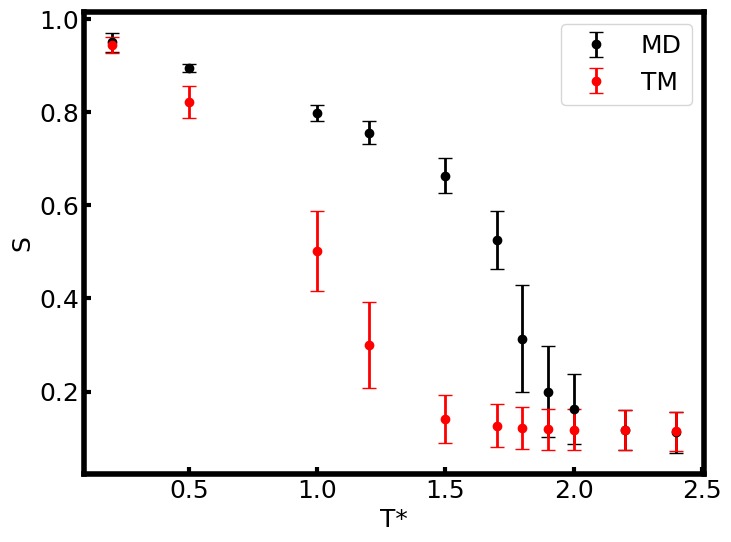

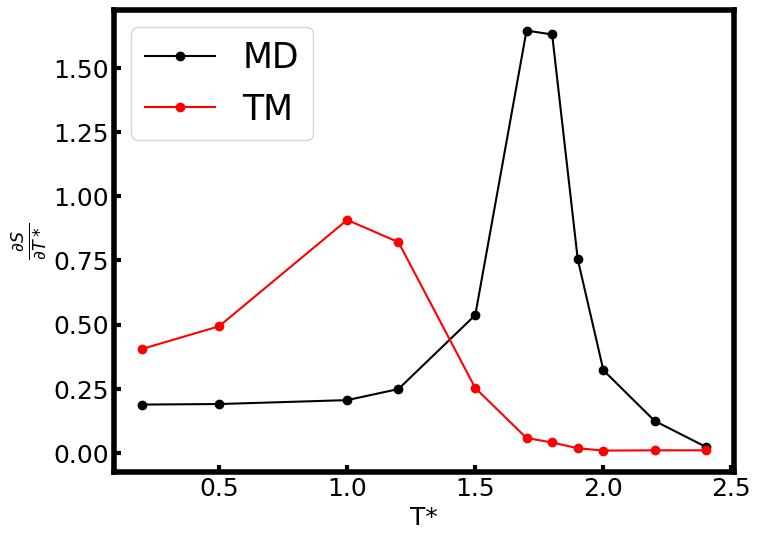

50 512 0.01


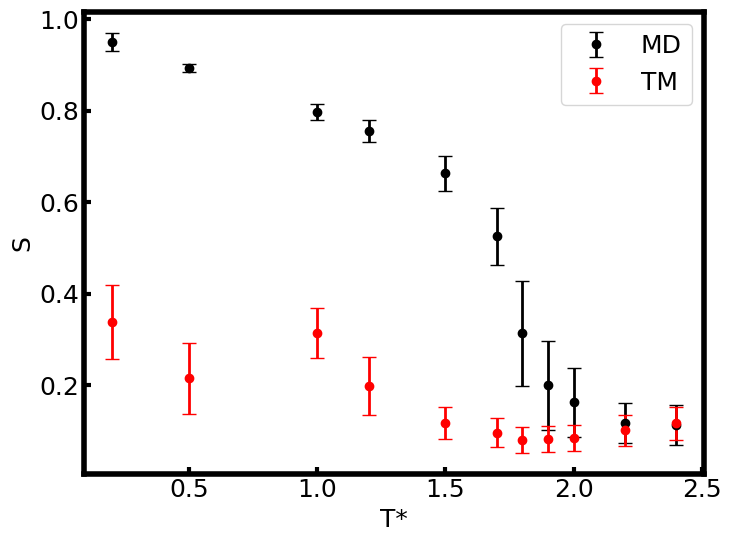

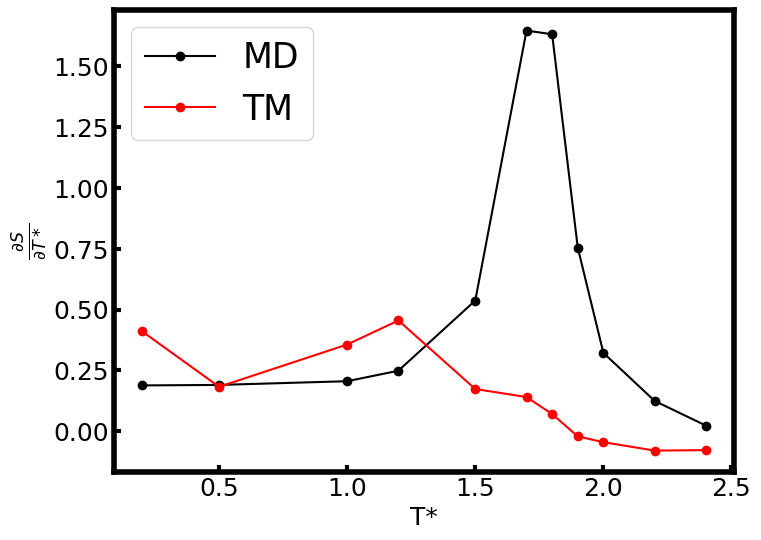

50 1024 0.001


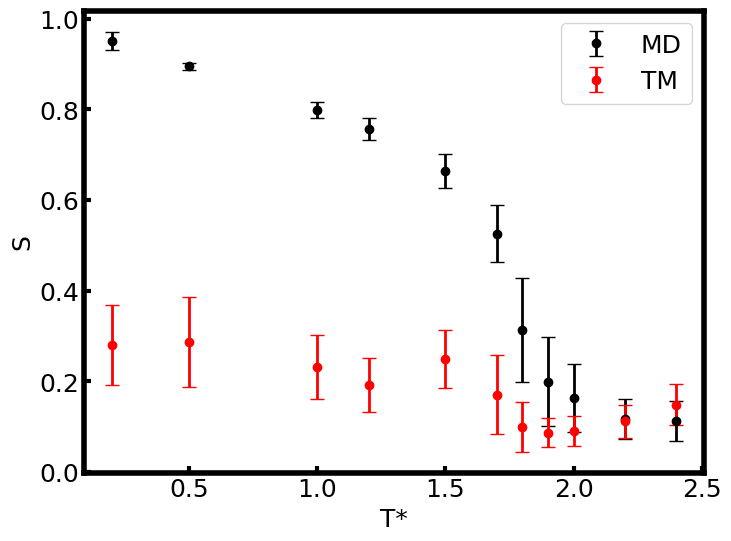

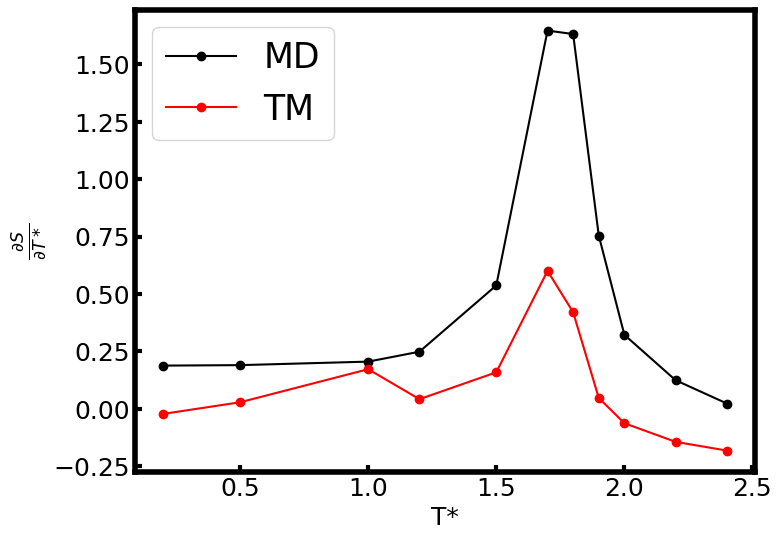

50 1024 0.005


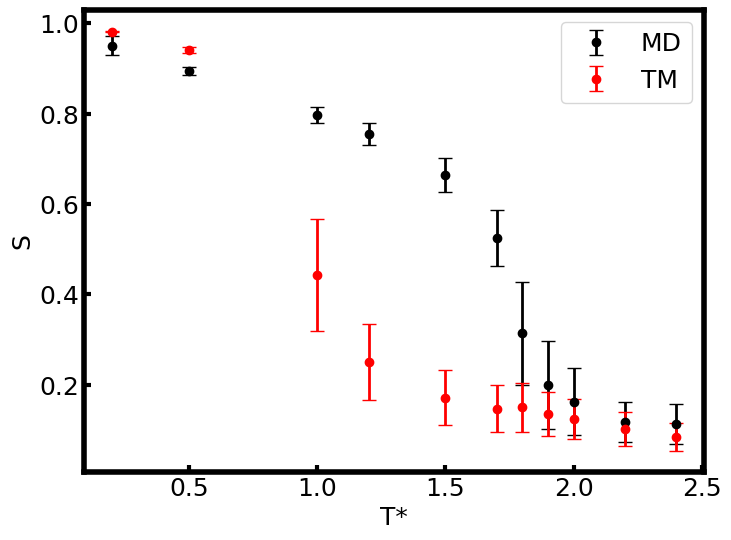

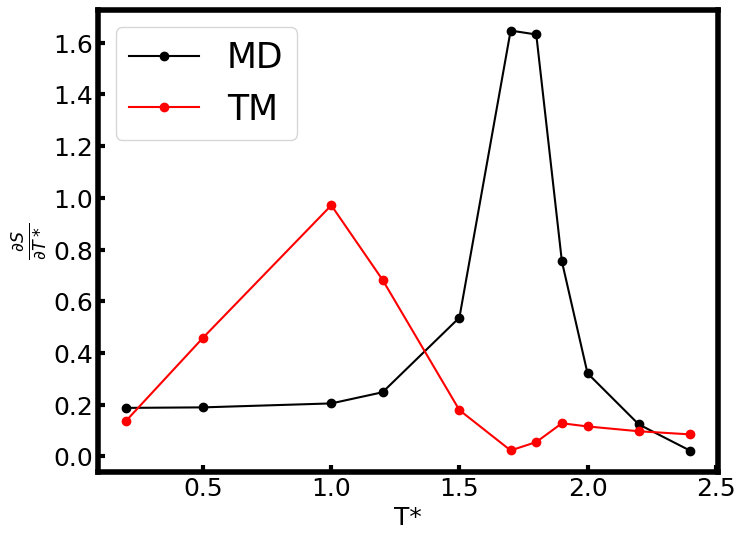

50 1024 0.01


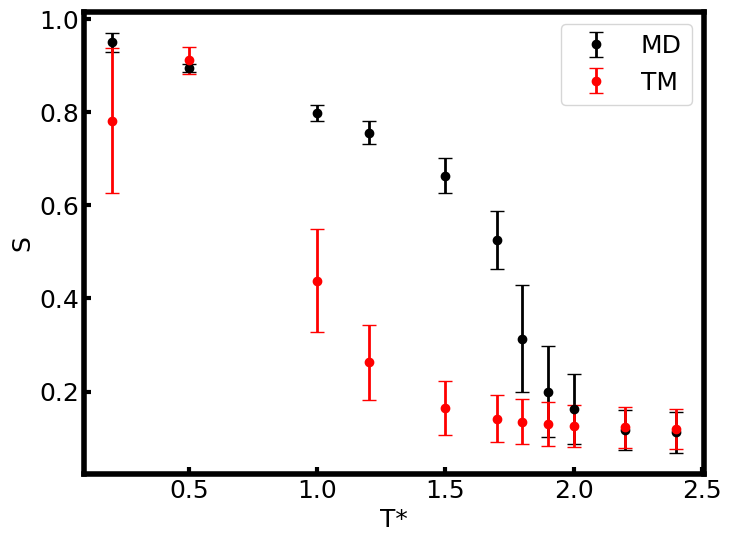

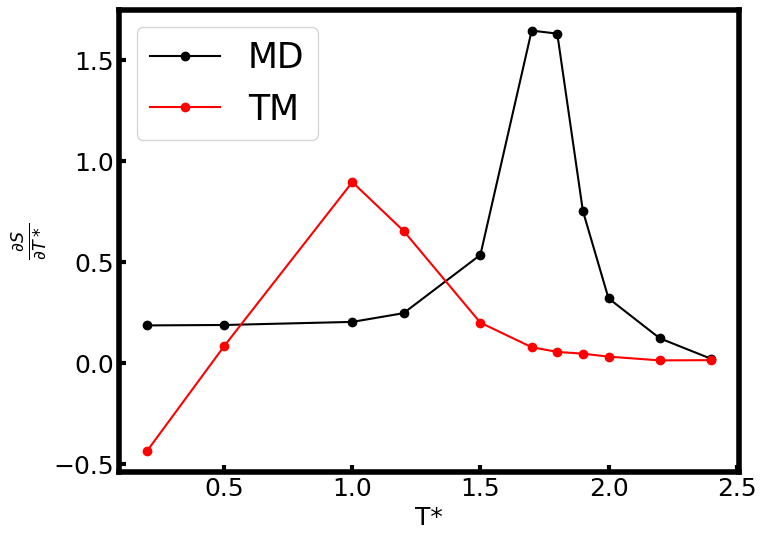

50 2048 0.001


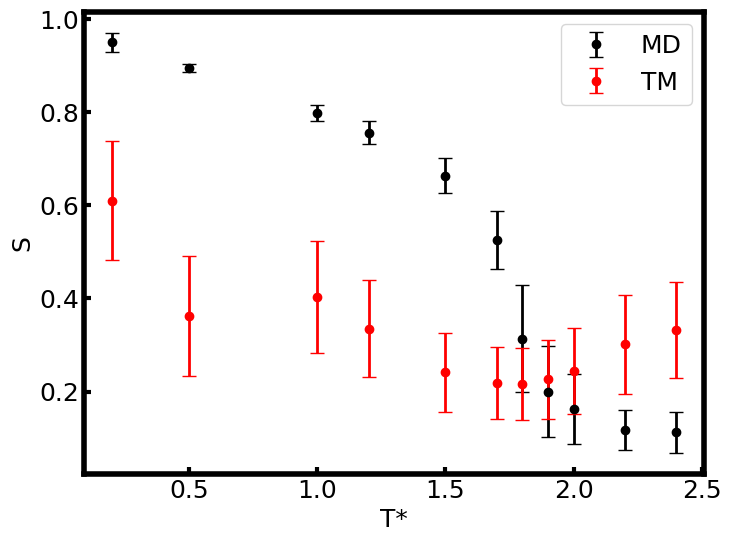

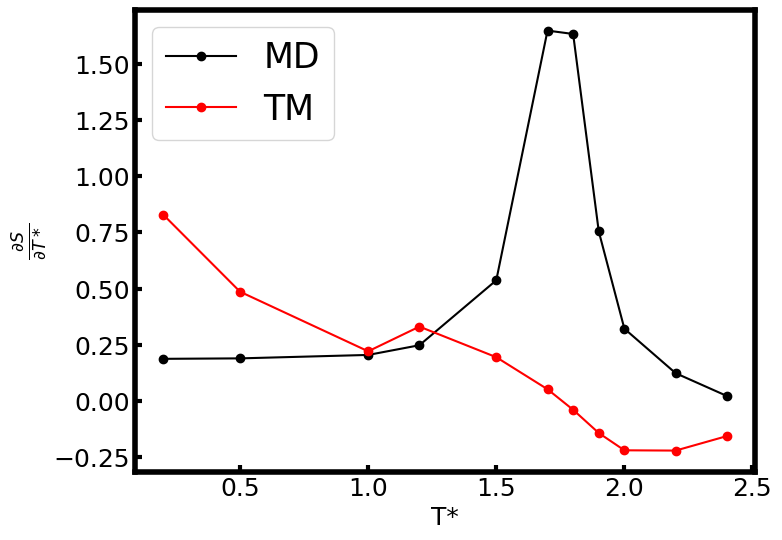

50 2048 0.005


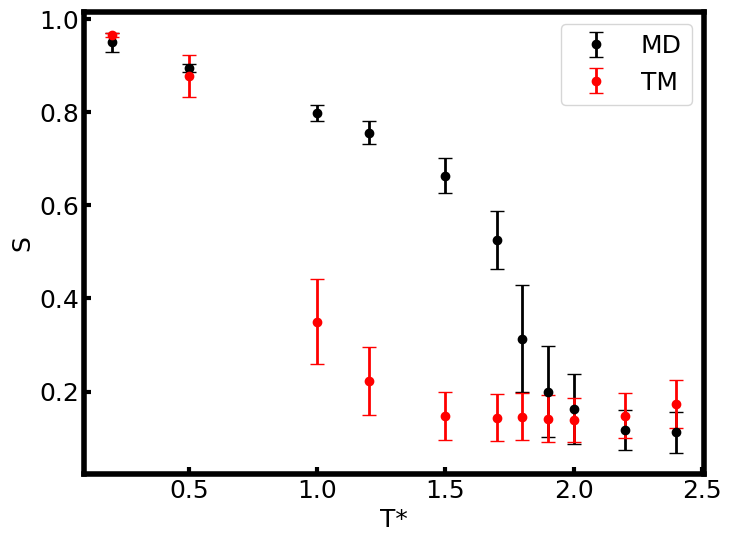

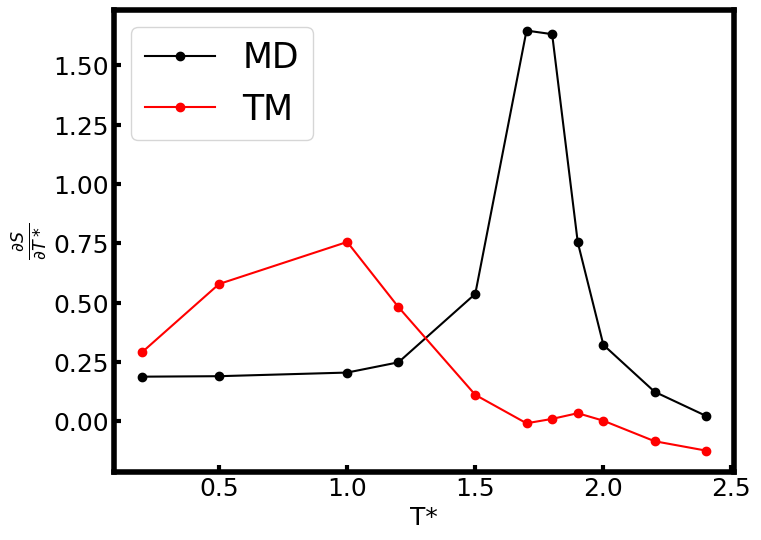

50 2048 0.01


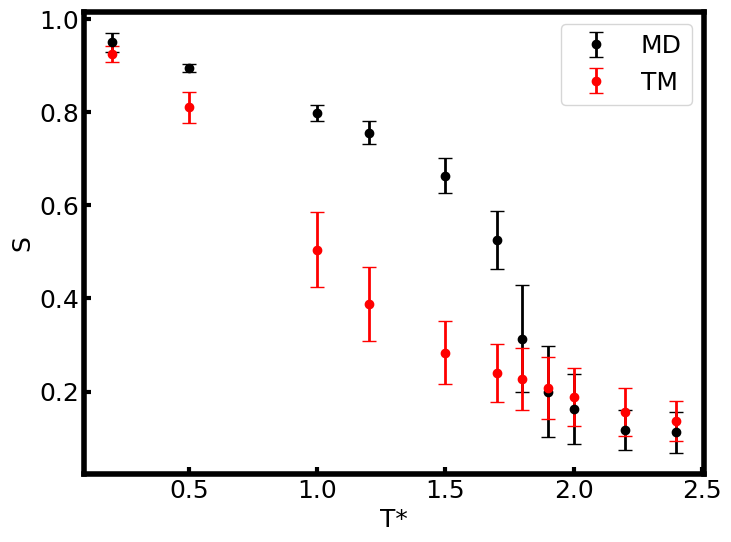

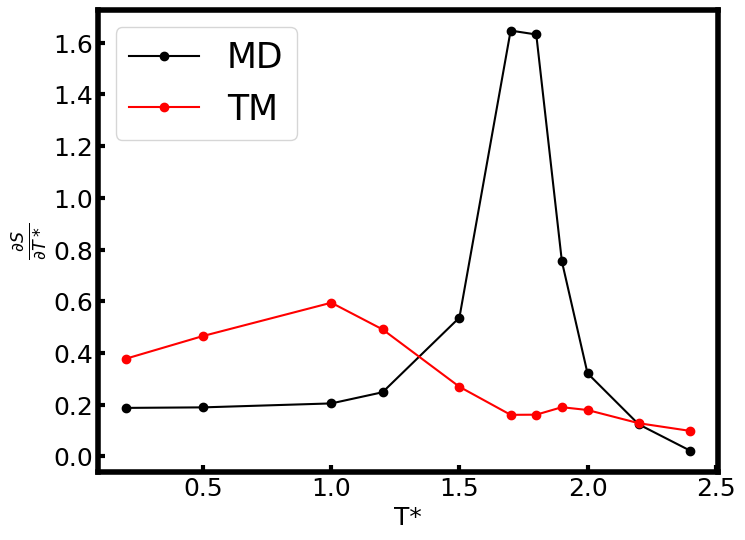

100 256 0.001


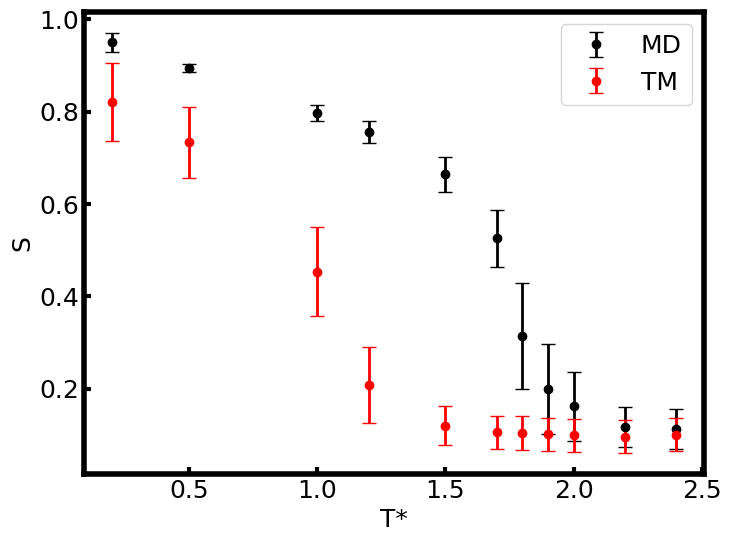

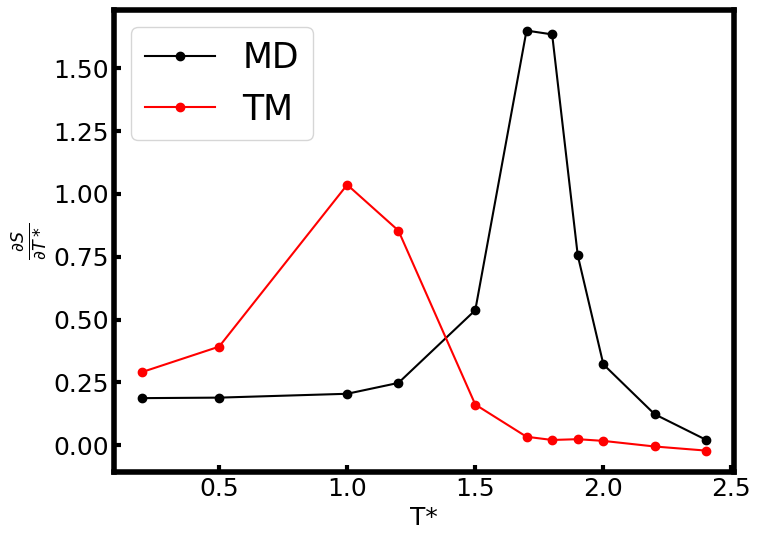

100 256 0.005


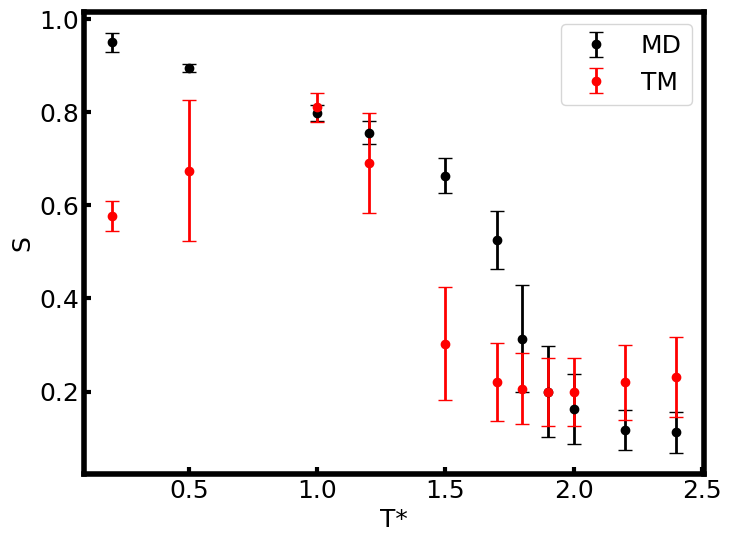

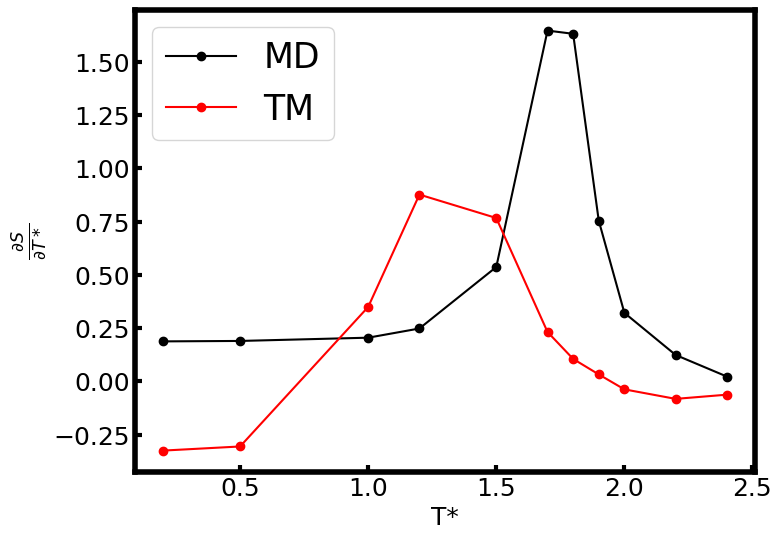

100 256 0.01


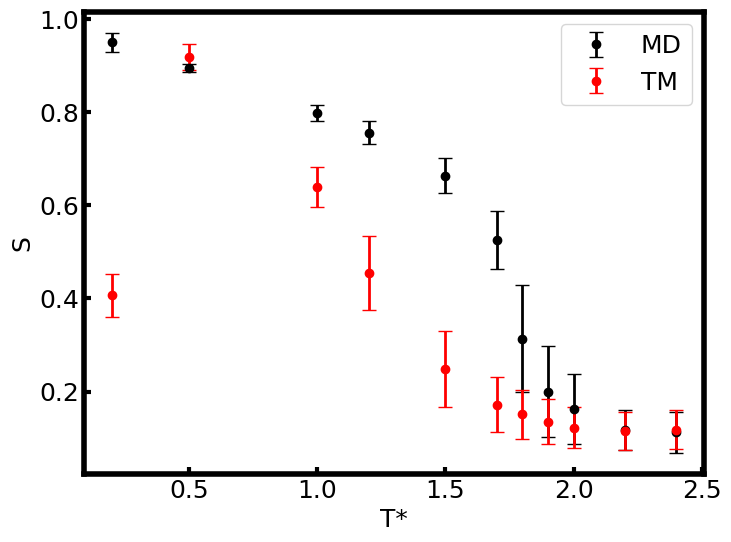

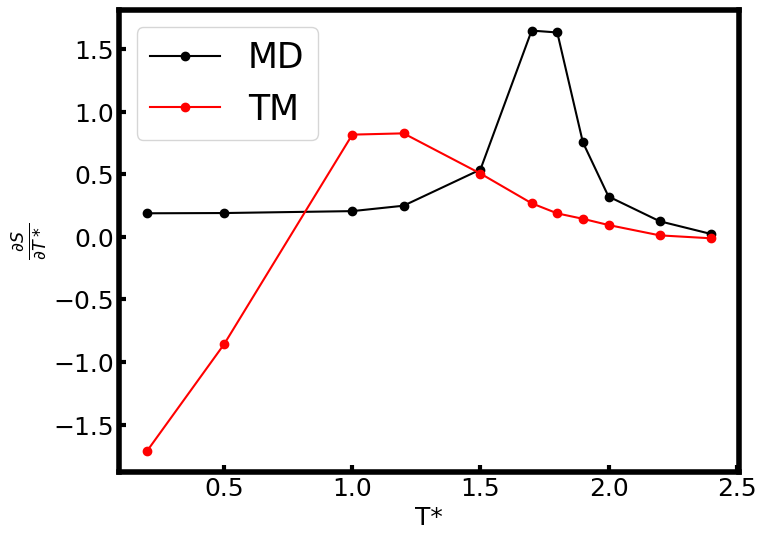

100 512 0.001


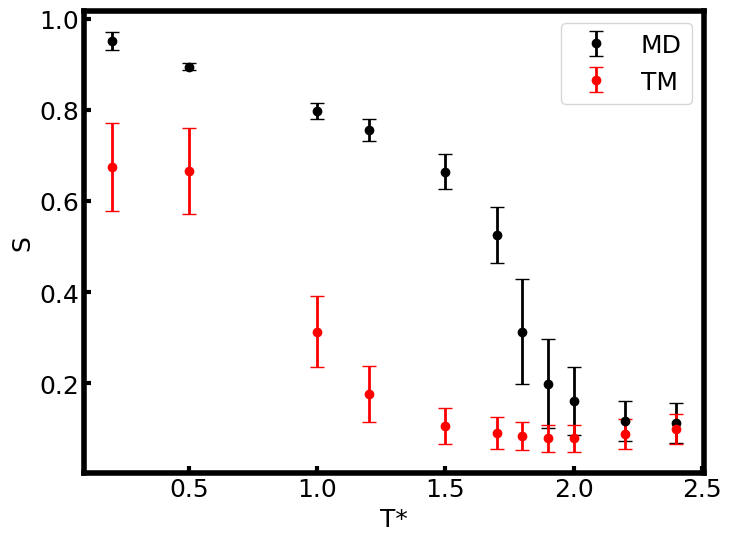

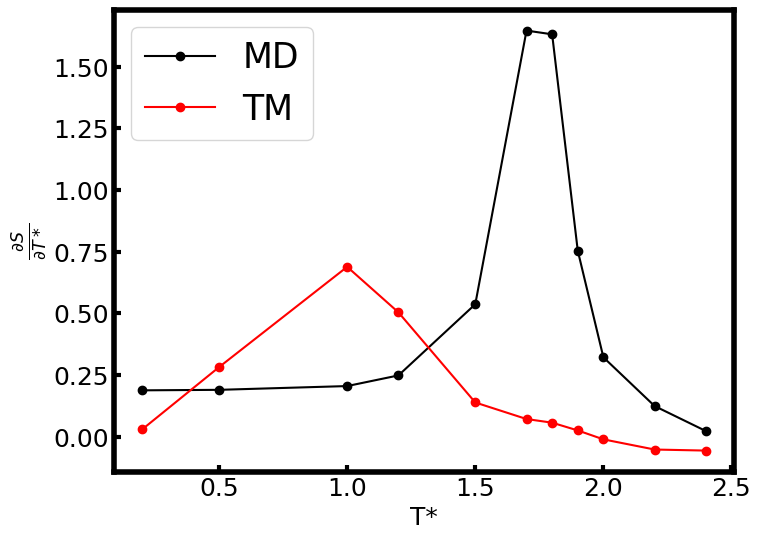

100 512 0.005


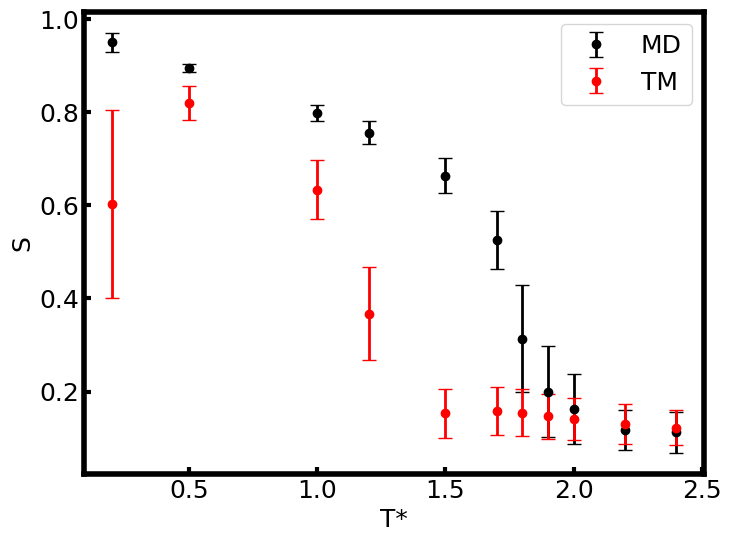

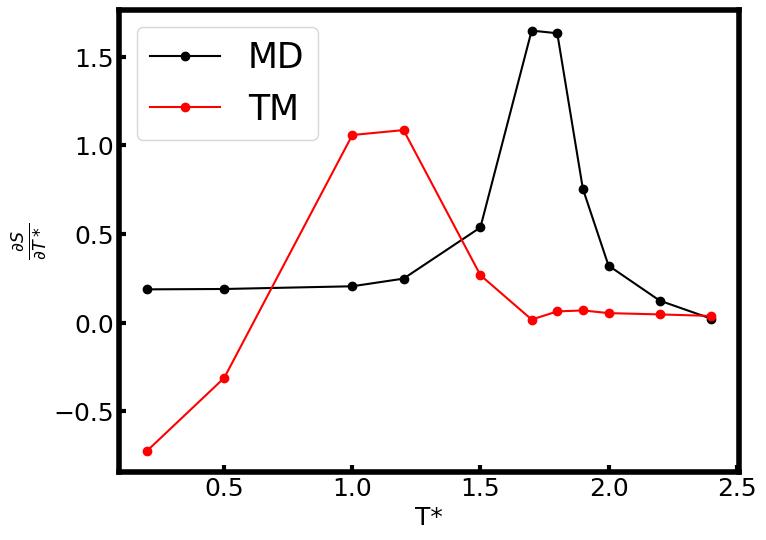

100 512 0.01


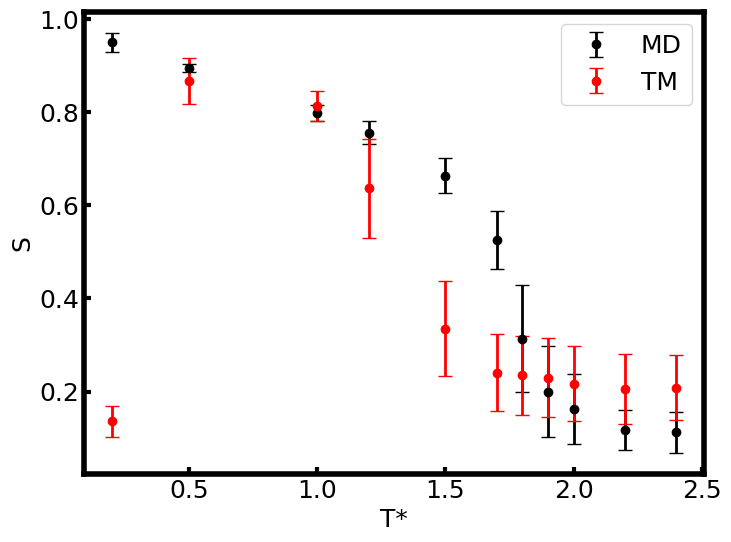

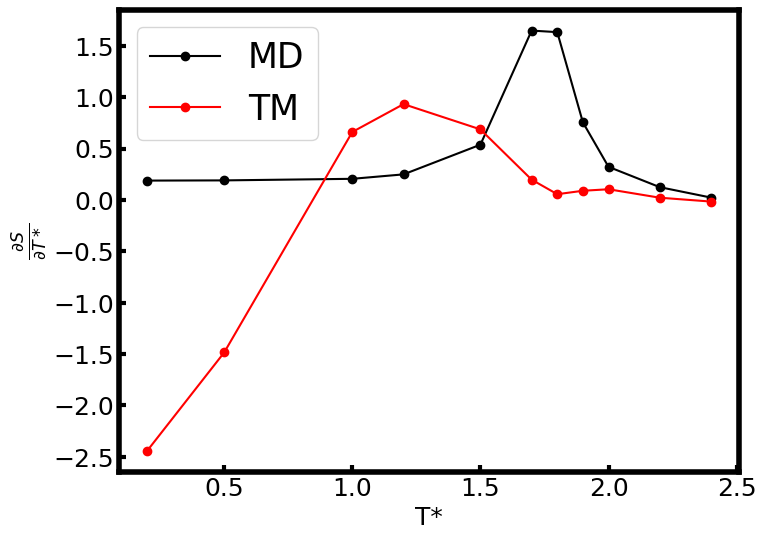

100 1024 0.001


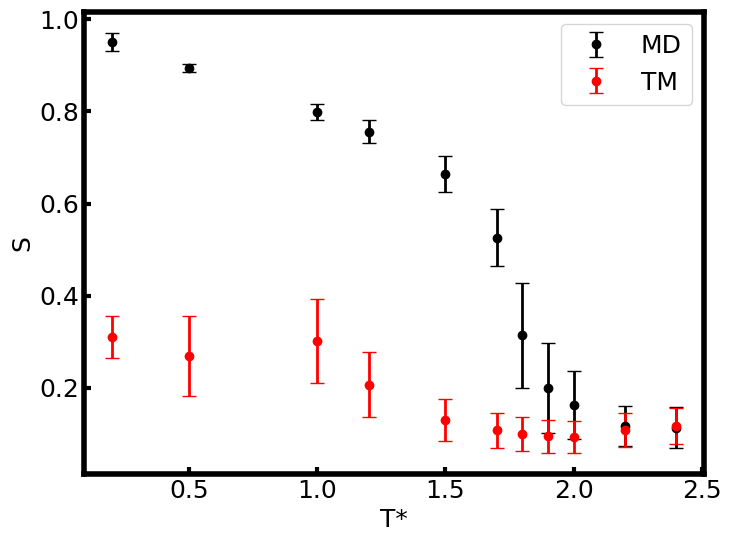

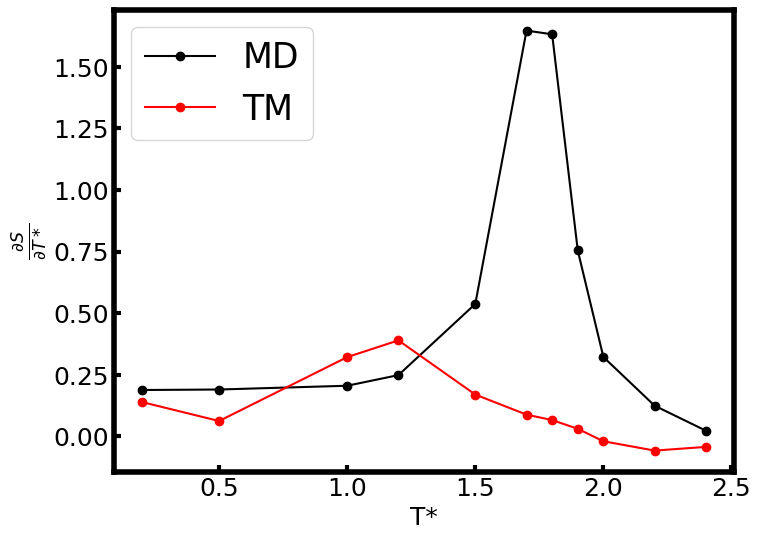

100 1024 0.005


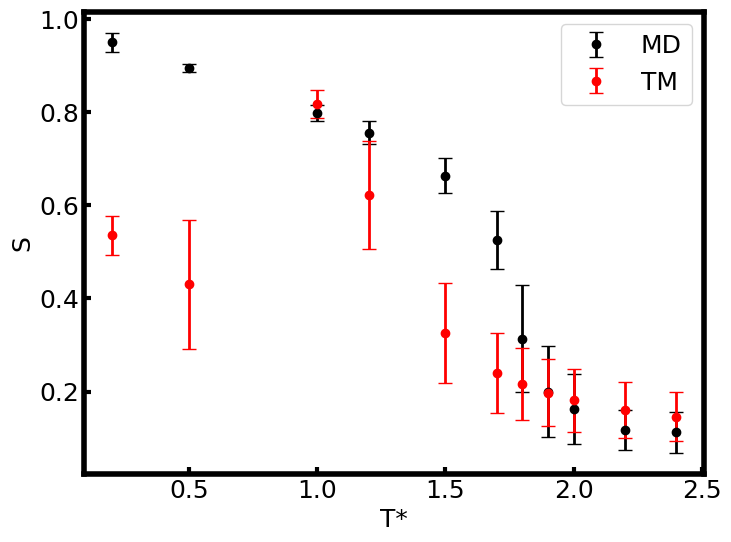

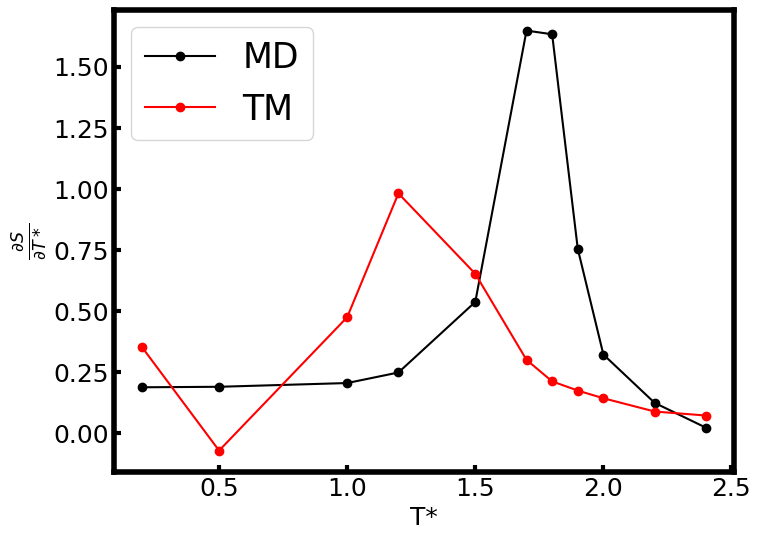

100 1024 0.01


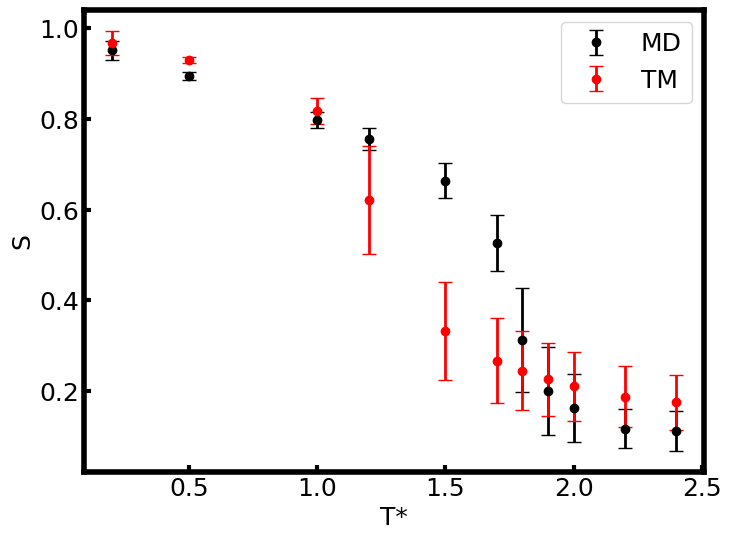

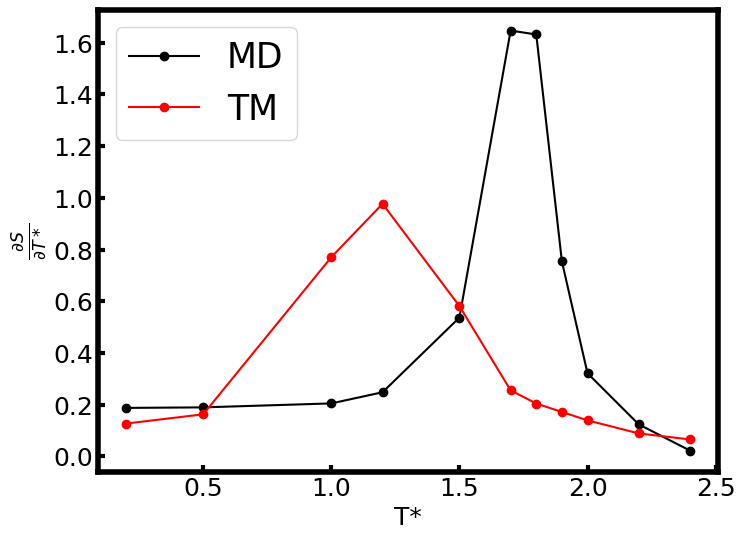

100 2048 0.001


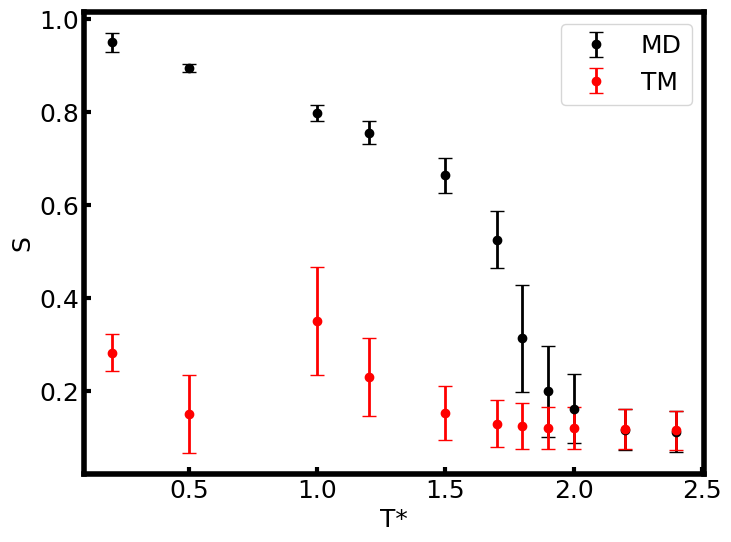

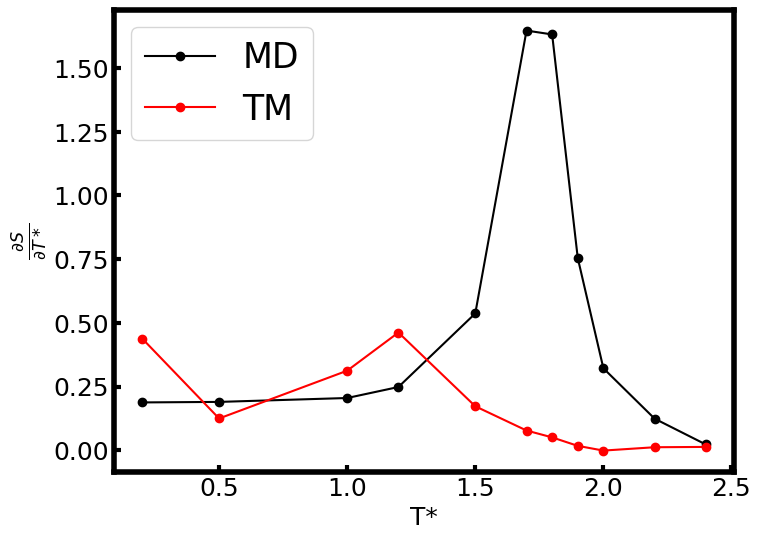

100 2048 0.005


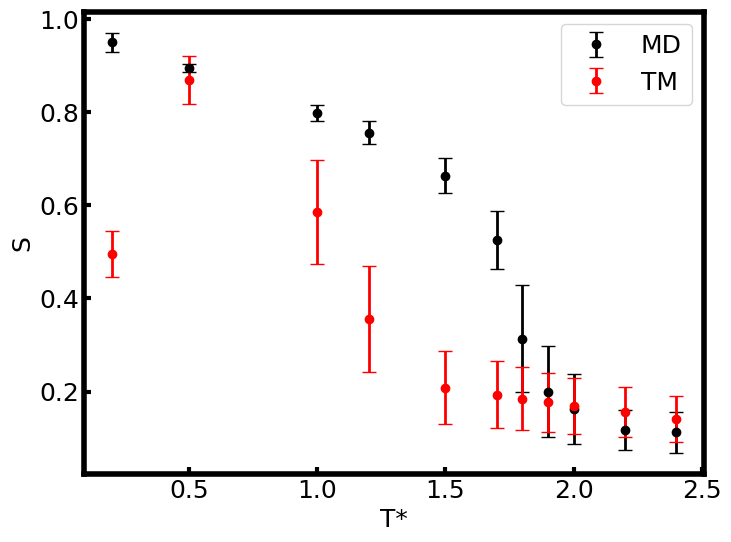

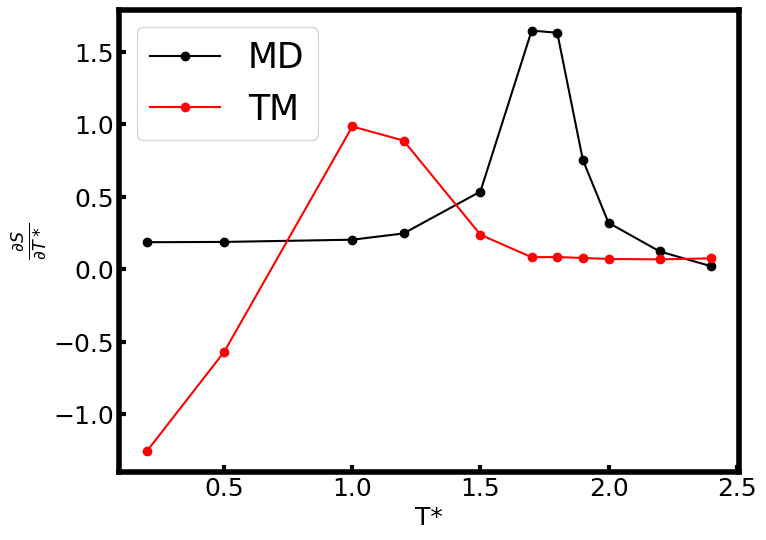

100 2048 0.01


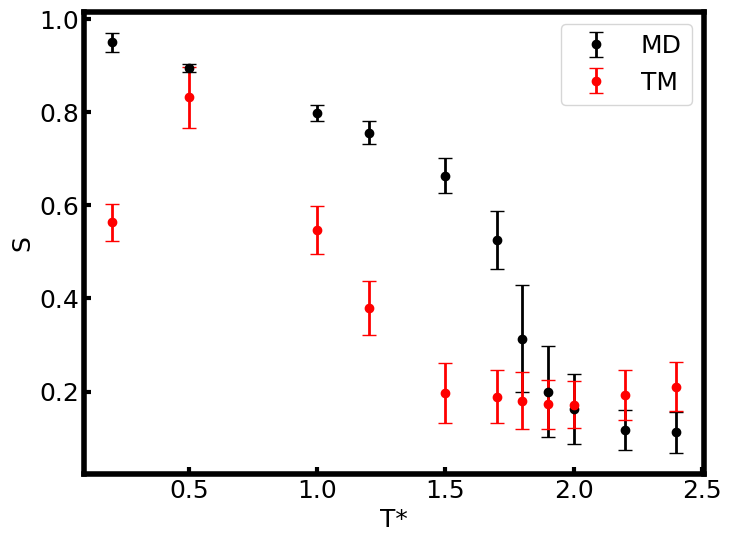

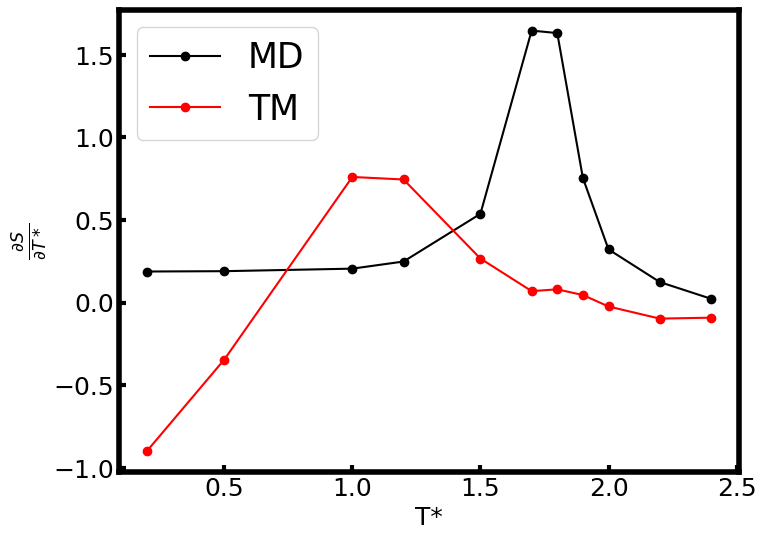

In [13]:
for nstep in [25, 50, 100]:
    for bs in [256, 512, 1024, 2048]:
        for lr in [0.001, 0.005, 0.01]:
            print(nstep, bs, lr)

            try:
                mag = np.load('nstep_%s_bs_%s_lr_%smagnetization_redo_med.npy' % (nstep, bs, lr))
                plt.errorbar(T_list, mean_S, yerr = std_S, elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'k', label = 'MD')
                plt.errorbar(mag[:,0], mag[:,1], yerr = mag[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'r', label = 'TM',)
                #mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
                #plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
                #            capsize = 5, c = 'b', label = 'two-point TM',)
                plt.legend(fontsize = 18)
                plt.xlabel('T*', size = 18)
                plt.ylabel('S', size = 18)
                plt.tick_params(labelsize = 18)
                plt.show()
                plt.close()
                
                plt.plot(T_list, -np.gradient(mean_S, T_list), marker = 'o', c = 'k', label = 'MD')
                plt.plot(mag[:,0], -np.gradient(mag[:,1], mag[:,0]), marker = 'o', c = 'r', label = 'TM')
                #plt.plot(mag_med[:,0], -np.gradient(mag_med[:,1], mag_med[:,0]), marker = 'o', c = 'b', label = 'more TM')
                plt.ylabel(r'$\frac{\partial S}{\partial T*}$', size = 18)
                plt.xlabel('T*', size = 18)
                plt.tick_params(labelsize = 18)
                plt.legend()
                plt.show()
                plt.close()
            except FileNotFoundError:
                pass

In [13]:
np.load('HP_nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))

FileNotFoundError: [Errno 2] No such file or directory: 'HP_nstep_100_bs_2048_lr_0.01_magnetization_redo.npy'

In [8]:
mag_med.shape

(11, 3)

100 1024 0.01


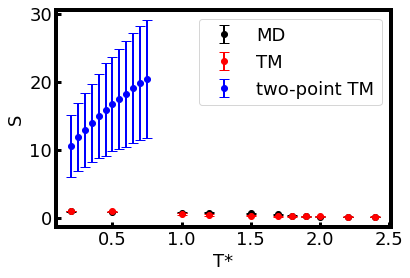

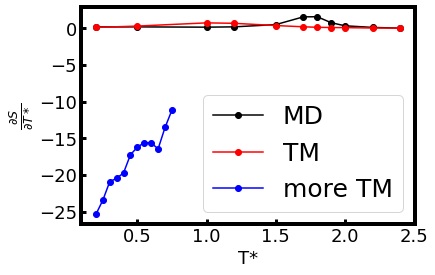

In [9]:
for nstep in [100]:
    for bs in [1024]:
        for lr in [0.01]:
            print(nstep, bs, lr)

            try:
                mag = np.load('nstep_%s_bs_%s_lr_%s_magnetization.npy' % (nstep, bs, lr))
                plt.errorbar(T_list, mean_S, yerr = std_S, elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'k', label = 'MD')
                plt.errorbar(mag[:,0], mag[:,1], yerr = mag[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'r', label = 'TM',)
                mag_med = np.load('naive_nvt_nstep_%s_bs_%s_lr_%s_magnetization.npy' % (nstep, bs, lr))
                plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'b', label = 'two-point TM',)
                plt.legend(fontsize = 18)
                plt.xlabel('T*', size = 18)
                plt.ylabel('S', size = 18)
                plt.tick_params(labelsize = 18)
                plt.show()
                plt.close()
                
                plt.plot(T_list, -np.gradient(mean_S, T_list), marker = 'o', c = 'k', label = 'MD')
                plt.plot(mag[:,0], -np.gradient(mag[:,1], mag[:,0]), marker = 'o', c = 'r', label = 'TM')
                plt.plot(mag_med[:,0], -np.gradient(mag_med[:,1], mag_med[:,0]), marker = 'o', c = 'b', label = 'more TM')
                plt.ylabel(r'$\frac{\partial S}{\partial T*}$', size = 18)
                plt.xlabel('T*', size = 18)
                plt.tick_params(labelsize = 18)
                plt.legend()
                plt.show()
                plt.close()
            except FileNotFoundError:
                pass

25 256 0.01


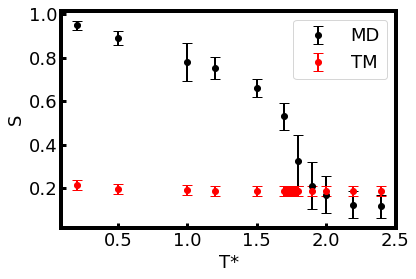

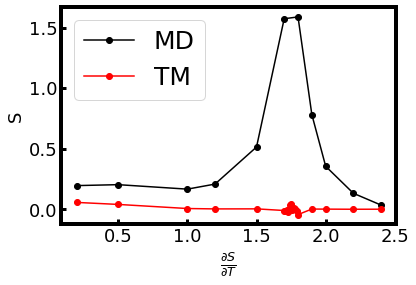

25 256 0.1


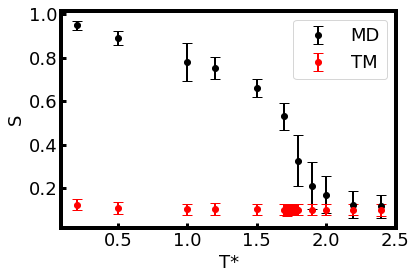

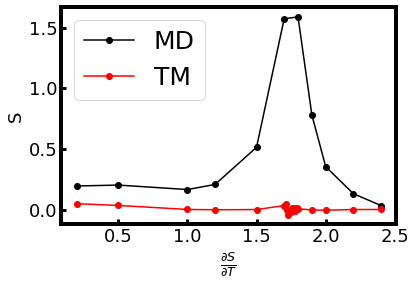

25 512 0.01


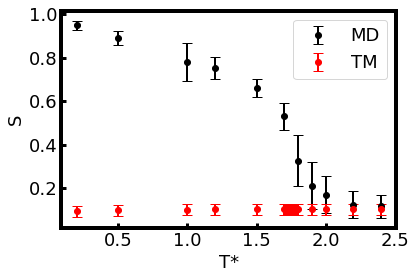

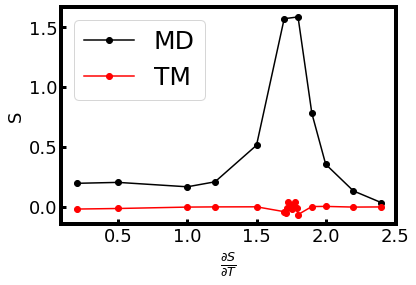

25 512 0.1


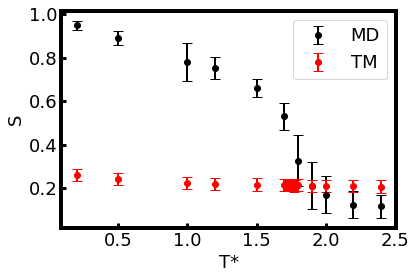

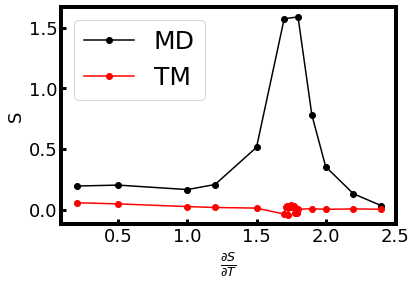

25 1024 0.01


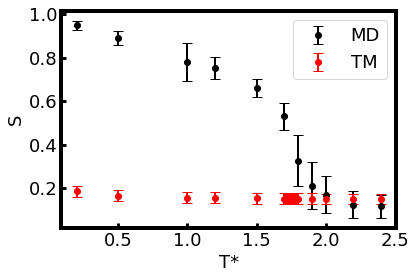

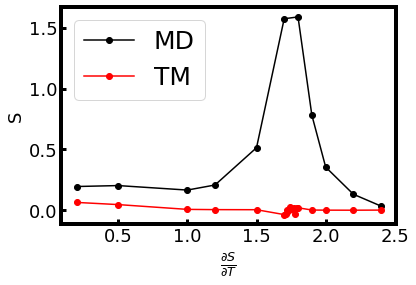

25 1024 0.1


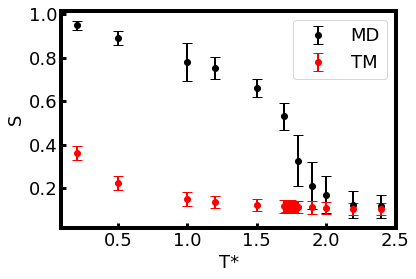

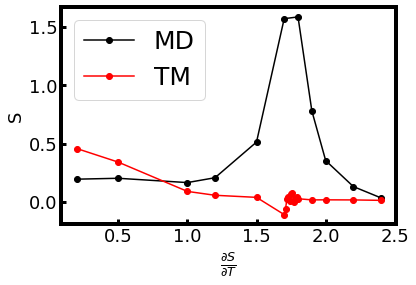

50 256 0.01


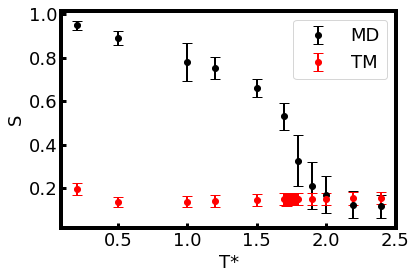

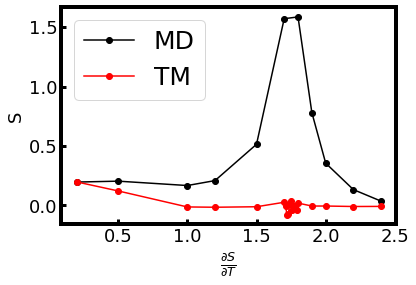

50 256 0.1


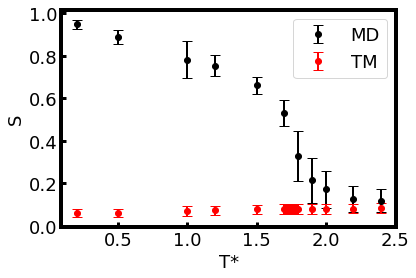

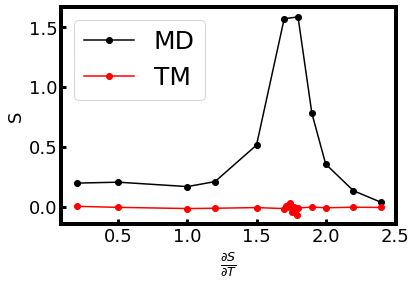

50 512 0.01


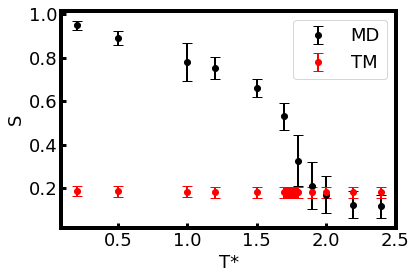

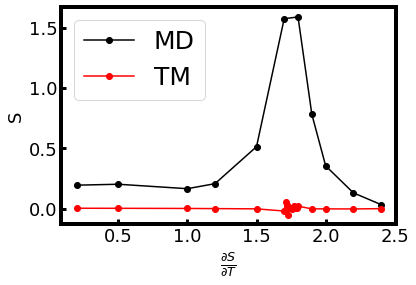

50 512 0.1


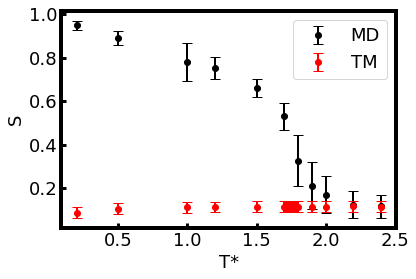

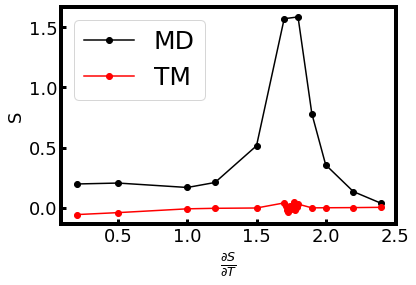

50 1024 0.01


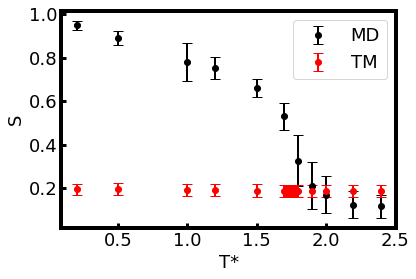

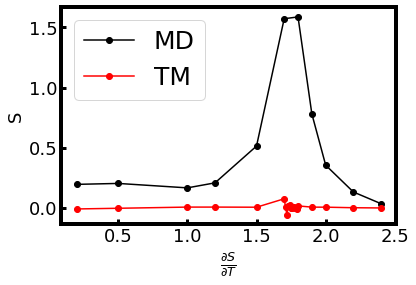

50 1024 0.1


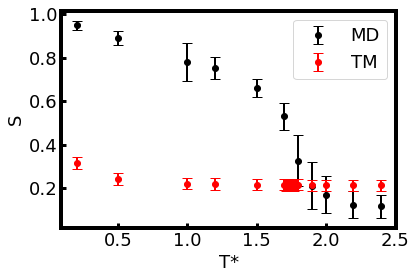

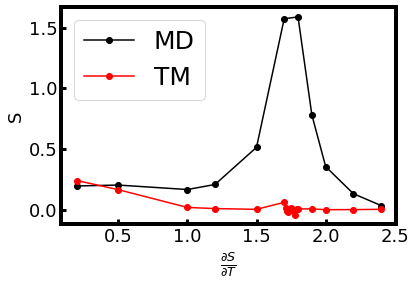

100 256 0.01


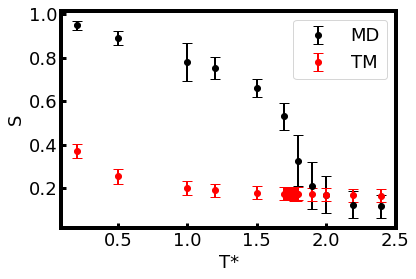

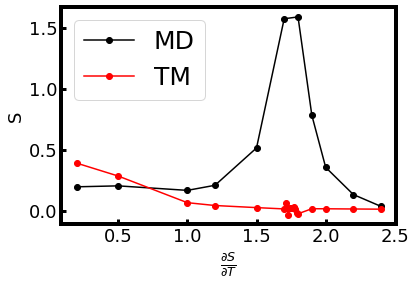

100 256 0.1


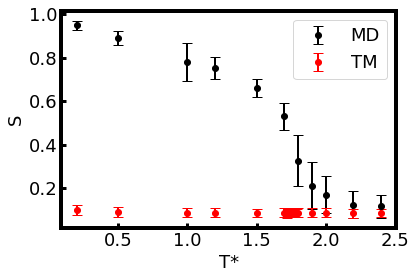

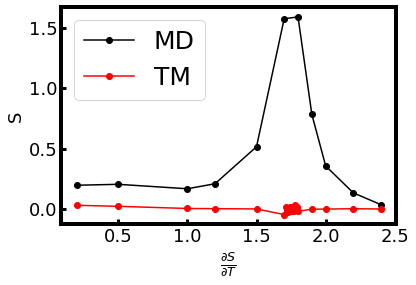

100 512 0.01


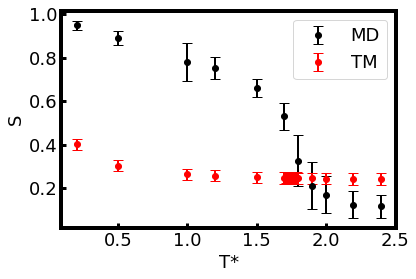

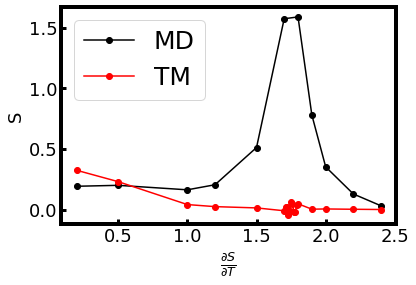

100 512 0.1


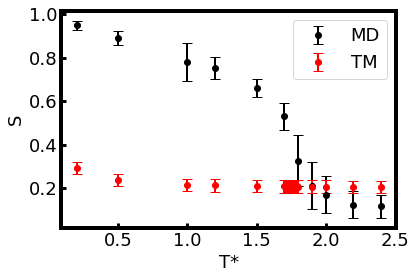

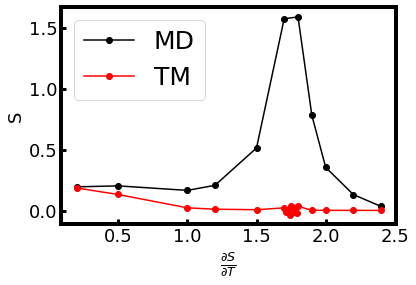

100 1024 0.01


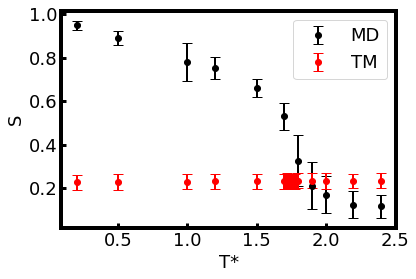

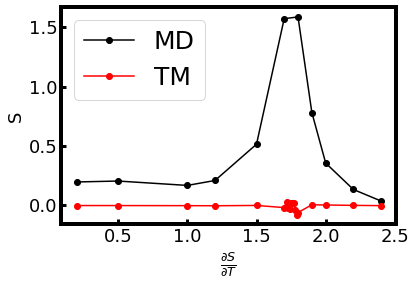

100 1024 0.1


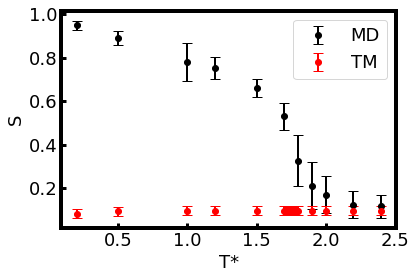

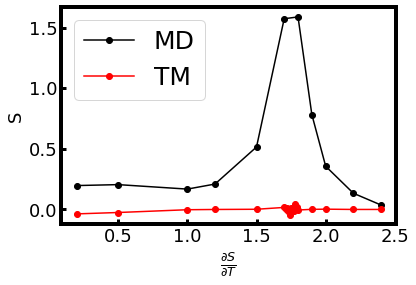

In [10]:
for nstep in [25, 50, 100]:
    for bs in [256, 512, 1024]:
        for lr in [0.01, 0.1]:
            print(nstep, bs, lr)

            try:
                mag = np.load('inferred_nstep_%s_bs_%s_lr_%s_magnetization.npy' % (nstep, bs, lr))
                plt.errorbar(T_list, mean_S, yerr = std_S, elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'k', label = 'MD')
                plt.errorbar(mag[:,0], mag[:,1], yerr = mag[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'r', label = 'TM',)
                plt.legend(fontsize = 18)
                plt.xlabel('T*', size = 18)
                plt.ylabel('S', size = 18)
                plt.tick_params(labelsize = 18)
                plt.show()
                plt.close()
                
                plt.plot(T_list, -np.gradient(mean_S, T_list), marker = 'o', c = 'k', label = 'MD')
                plt.plot(mag[:,0], -np.gradient(mag[:,1], mag[:,0]), marker = 'o', c = 'r', label = 'TM')
                plt.xlabel(r'$\frac{\partial S}{\partial T}$', size = 18)
                plt.ylabel('S', size = 18)
                plt.tick_params(labelsize = 18)
                plt.legend()
                plt.show()
                plt.close()
            except FileNotFoundError:
                pass

25 256 0.01


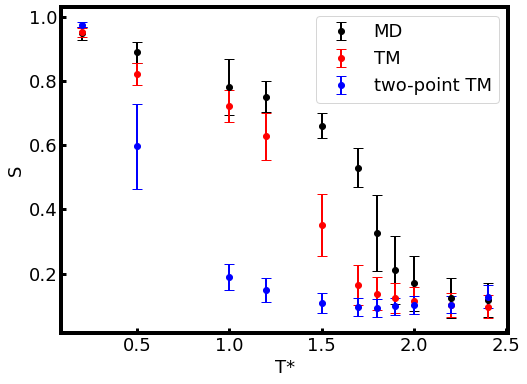

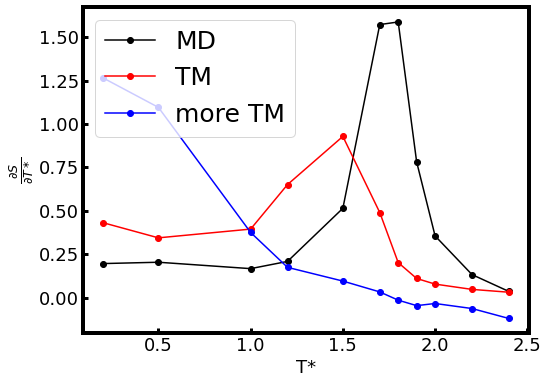

25 256 0.001
25 512 0.01


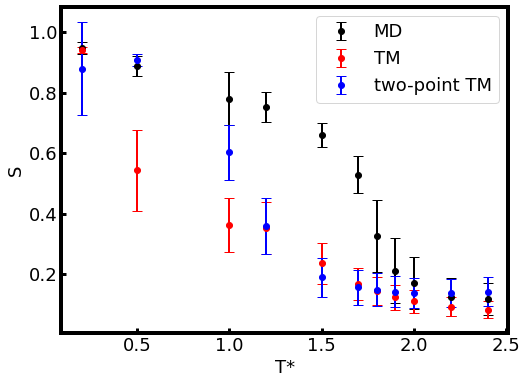

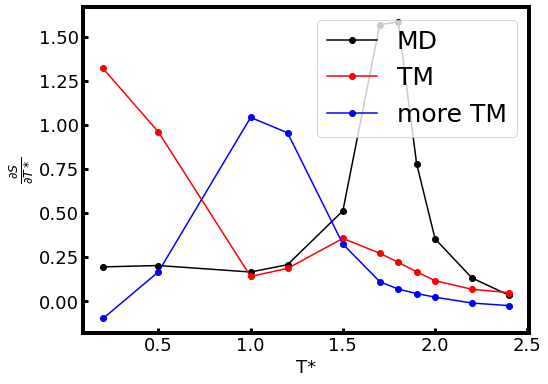

25 512 0.001
25 1024 0.01


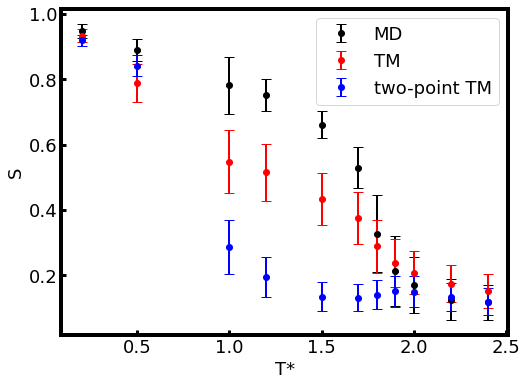

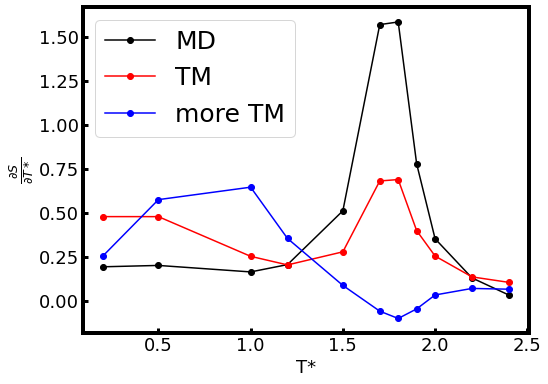

25 1024 0.001
25 2048 0.01


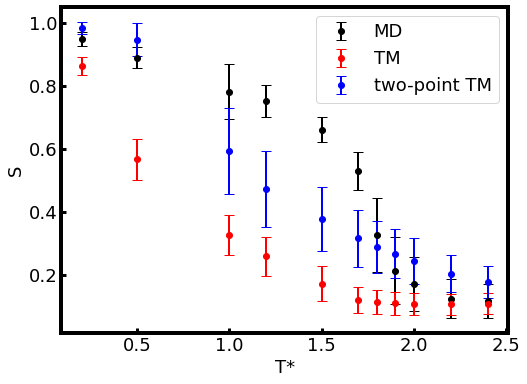

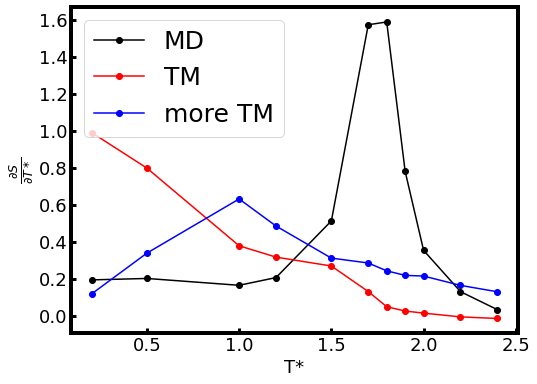

25 2048 0.001
50 256 0.01


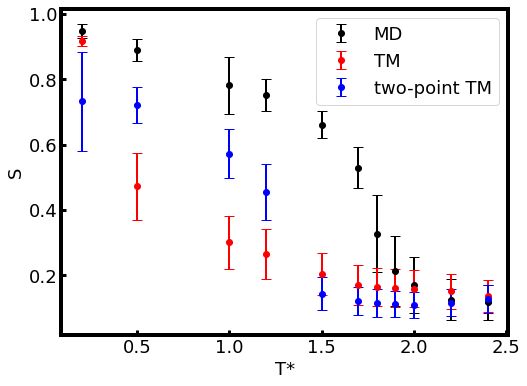

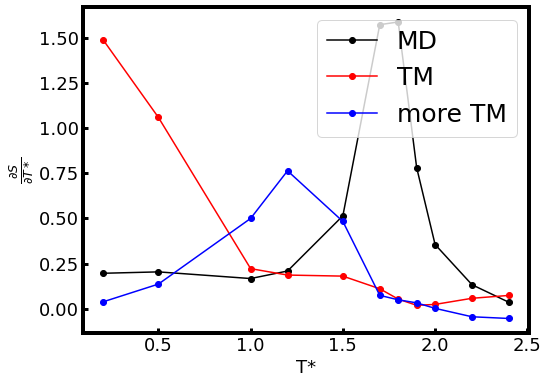

50 256 0.001
50 512 0.01
50 512 0.001
50 1024 0.01
50 1024 0.001
50 2048 0.01
50 2048 0.001


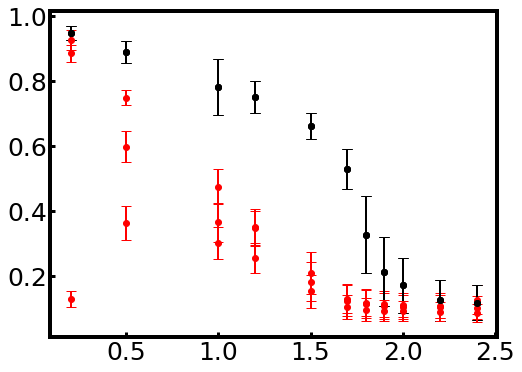

In [13]:
for nstep in [25, 50]:
    for bs in [256, 512, 1024, 2048]:
        for lr in [0.01, 0.001]:
            print(nstep, bs, lr)

            try:
                mag = np.load('nstep_%s_bs_%s_lr_%s_magnetization.npy' % (nstep, bs, lr))
                plt.errorbar(T_list, mean_S, yerr = std_S, elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'k', label = 'MD')
                plt.errorbar(mag[:,0], mag[:,1], yerr = mag[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'r', label = 'TM',)
                mag_med = np.load('nstep_%s_bs_%s_lr_%s_medmagnetization_med_redo.npy' % (nstep, bs, lr))
                plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'b', label = 'two-point TM',)
                plt.legend(fontsize = 18)
                plt.xlabel('T*', size = 18)
                plt.ylabel('S', size = 18)
                plt.tick_params(labelsize = 18)
                plt.show()
                plt.close()
                
                plt.plot(T_list, -np.gradient(mean_S, T_list), marker = 'o', c = 'k', label = 'MD')
                plt.plot(mag[:,0], -np.gradient(mag[:,1], mag[:,0]), marker = 'o', c = 'r', label = 'TM')
                plt.plot(mag_med[:,0], -np.gradient(mag_med[:,1], mag_med[:,0]), marker = 'o', c = 'b', label = 'more TM')
                plt.ylabel(r'$\frac{\partial S}{\partial T*}$', size = 18)
                plt.xlabel('T*', size = 18)
                plt.tick_params(labelsize = 18)
                plt.legend()
                plt.show()
                plt.close()
            except FileNotFoundError:
                pass

25 256 0.01
25 256 0.001
25 512 0.01
25 512 0.001
25 1024 0.01
25 1024 0.001
25 2048 0.01
25 2048 0.001
50 256 0.01
50 256 0.001
50 512 0.01


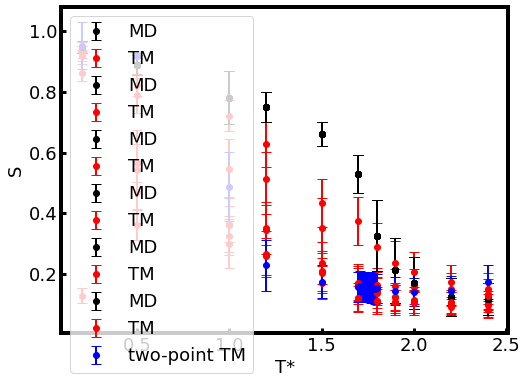

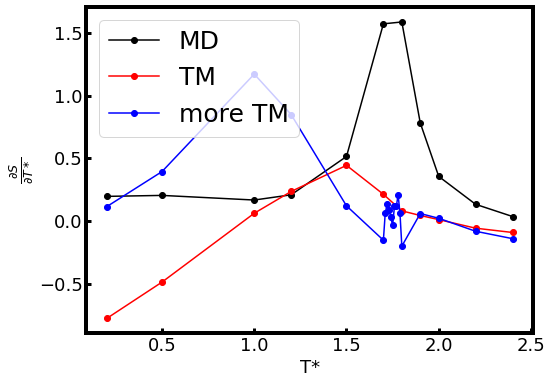

50 512 0.001
50 1024 0.01


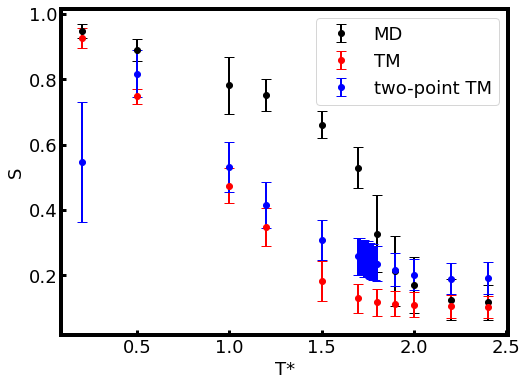

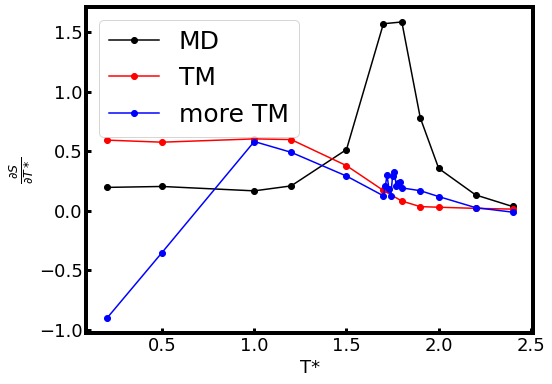

50 1024 0.001
50 2048 0.01


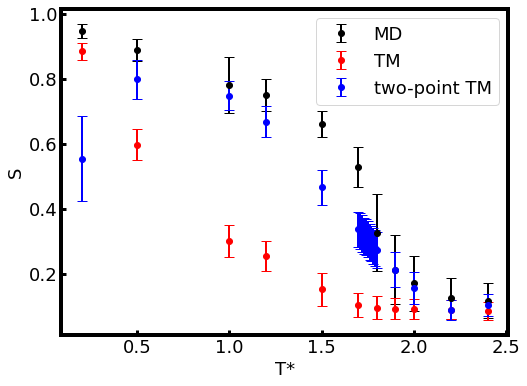

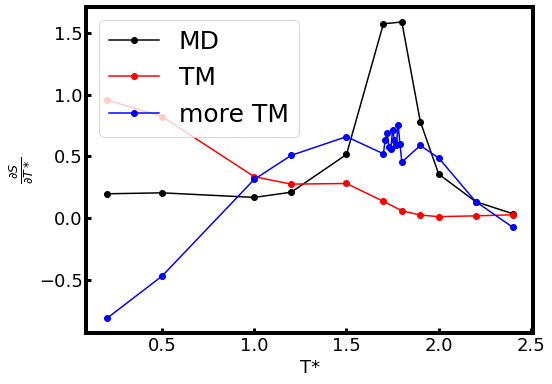

50 2048 0.001
100 256 0.01


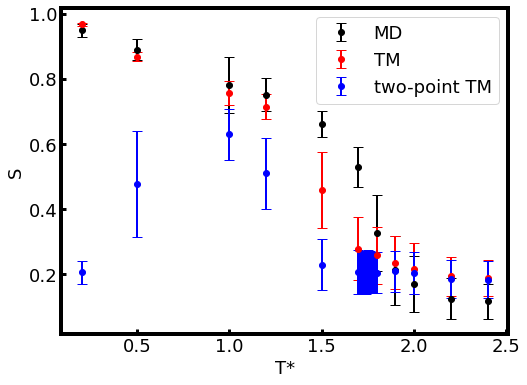

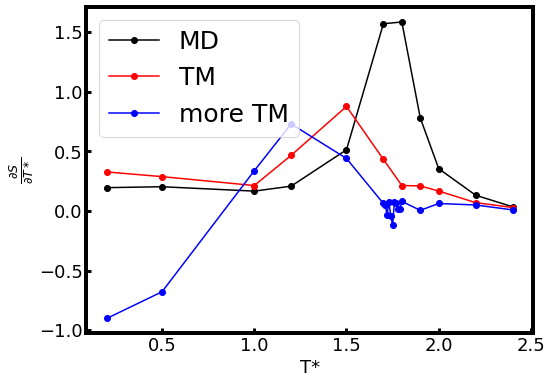

100 256 0.001


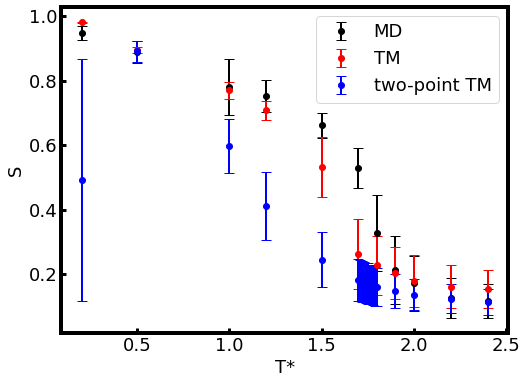

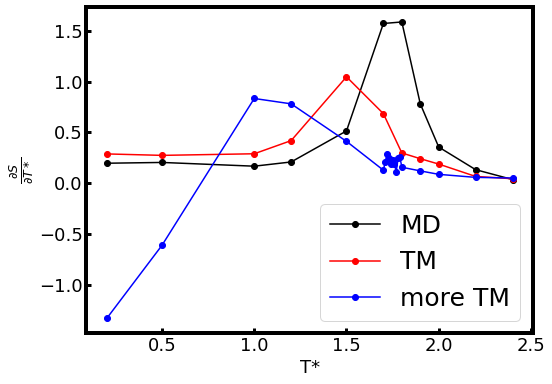

100 512 0.01


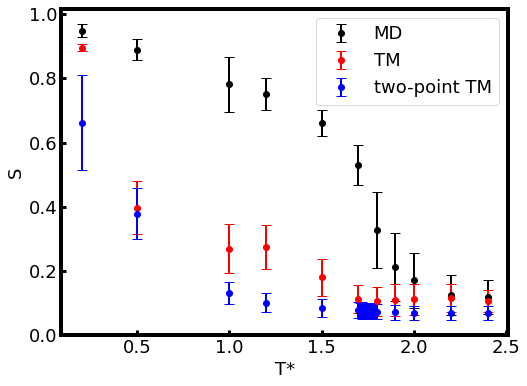

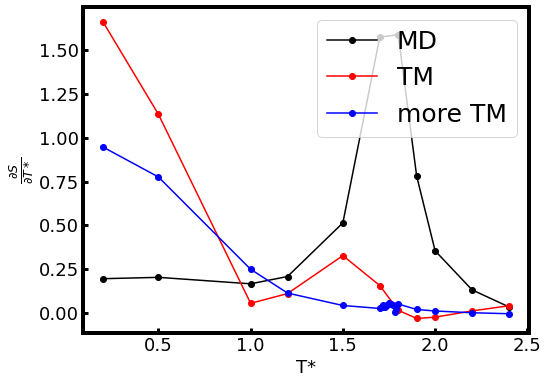

100 512 0.001


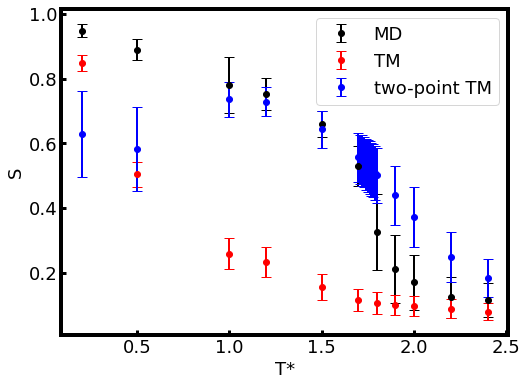

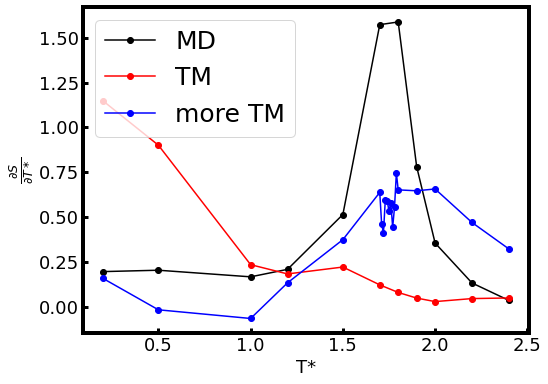

100 1024 0.01


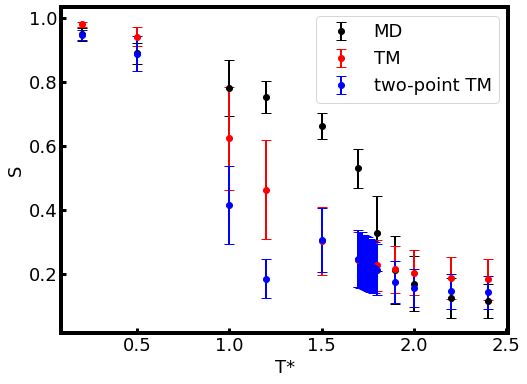

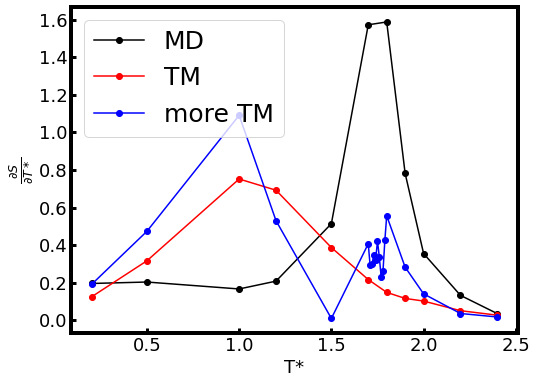

100 1024 0.001


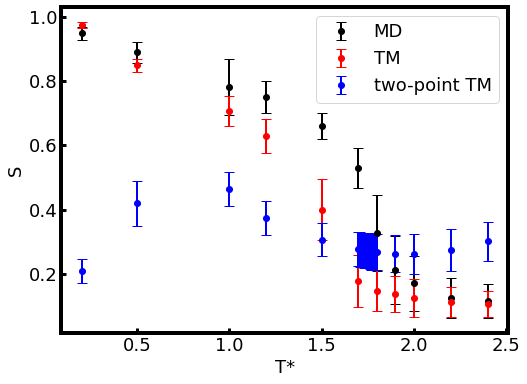

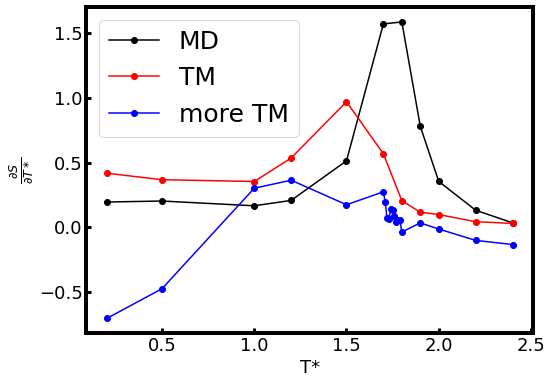

100 2048 0.01


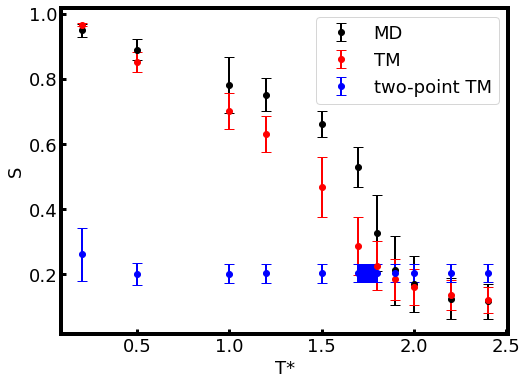

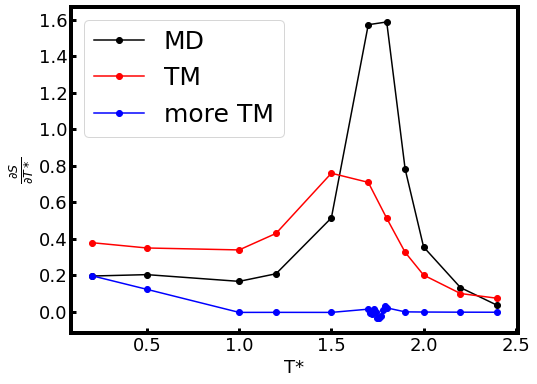

100 2048 0.001


In [12]:
for nstep in [25, 50, 100]:
    for bs in [256, 512, 1024, 2048]:
        for lr in [0.01, 0.001]:
            print(nstep, bs, lr)

            try:
                mag = np.load('nstep_%s_bs_%s_lr_%s_magnetization.npy' % (nstep, bs, lr))
                plt.errorbar(T_list, mean_S, yerr = std_S, elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'k', label = 'MD')
                plt.errorbar(mag[:,0], mag[:,1], yerr = mag[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'r', label = 'TM',)
                mag_med = np.load('nstep_%s_bs_%s_lr_%s_medmagnetization_redo.npy' % (nstep, bs, lr))
                plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
                            capsize = 5, c = 'b', label = 'two-point TM',)
                plt.legend(fontsize = 18)
                plt.xlabel('T*', size = 18)
                plt.ylabel('S', size = 18)
                plt.tick_params(labelsize = 18)
                plt.show()
                plt.close()
                
                plt.plot(T_list, -np.gradient(mean_S, T_list), marker = 'o', c = 'k', label = 'MD')
                plt.plot(mag[:,0], -np.gradient(mag[:,1], mag[:,0]), marker = 'o', c = 'r', label = 'TM')
                plt.plot(mag_med[:,0], -np.gradient(mag_med[:,1], mag_med[:,0]), marker = 'o', c = 'b', label = 'more TM')
                plt.ylabel(r'$\frac{\partial S}{\partial T*}$', size = 18)
                plt.xlabel('T*', size = 18)
                plt.tick_params(labelsize = 18)
                plt.legend()
                plt.show()
                plt.close()
            except FileNotFoundError:
                pass